# Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows=None
pd.options.display.max_columns = None
pd.options.display.width=1000
pd.options.display.expand_frame_repr=False
pd.options.display.float_format = '{:.2f}'.format

# Reading dataset

In [2]:
House = pd.read_excel("innercity.xlsx")

# Head of dataset

In [3]:
House.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.00,1.75,3050.00,9440.00,1,0,0.00,3,8.00,1800.00,1250.00,1966,0,98034,47.72,-122.18,2020.00,8660.00,0.00,12490
1,3145600250,20150317T000000,190000,2.00,1.00,670.00,3101.00,1,0,0.00,4,6.00,670.00,0.00,1948,0,98118,47.55,-122.27,1660.00,4100.00,0.00,3771
2,7129303070,20140820T000000,735000,4.00,2.75,3040.00,2415.00,2,1,4.00,3,8.00,3040.00,0.00,1966,0,98118,47.52,-122.26,2620.00,2433.00,0.00,5455
3,7338220280,20141010T000000,257000,3.00,2.50,1740.00,3721.00,2,0,0.00,3,8.00,1740.00,0.00,2009,0,98002,47.34,-122.21,2030.00,3794.00,0.00,5461
4,7950300670,20150218T000000,450000,2.00,1.00,1120.00,4590.00,1,0,0.00,3,7.00,1120.00,0.00,1924,0,98118,47.57,-122.28,1120.00,5100.00,0.00,5710


# Tail of dataset

In [4]:
House.tail()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
21608,203600600,20150310T000000,685530,4.00,2.50,3130.00,60467.00,2,0,0.00,3,9.00,3130.00,0.00,1996,0,98014,47.66,-121.96,2780.00,44224.00,1.00,63597
21609,625049281,20140521T000000,535000,2.00,1.00,1030.00,4841.00,1,0,0.00,3,7.00,920.00,110.00,1939,0,98103,47.69,-122.34,1530.00,4944.00,0.00,5871
21610,424069018,20140905T000000,998000,3.00,3.75,3710.00,34412.00,2,0,0.00,3,10.00,2910.00,800.00,1978,0,98075,47.59,-122.04,2390.00,34412.00,1.00,38122
21611,7258200055,20150206T000000,262000,4.00,2.50,1560.00,7800.00,2,0,0.00,3,7.00,1560.00,0.00,1997,0,98168,47.51,-122.32,1160.00,7800.00,0.00,9360
21612,8805900430,20141229T000000,1150000,4.00,2.50,1940.00,4875.00,2,0,0.00,4,9.00,1940.00,0.00,1925,0,98112,47.64,-122.30,1790.00,4875.00,1.00,6815


# Shape of dataset

In [5]:
print('The number of rows (observations) is',House.shape[0],'\n''The number of columns (variables) is',House.shape[1])

The number of rows (observations) is 21613 
The number of columns (variables) is 23


# Columns of dataset

In [6]:
House.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished', 'total_area'], dtype='object')

# Information of dataset

In [7]:
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

# Missing value 

In [8]:
House.isnull().sum().sum()

689

In [9]:
House_na = House.isna().sum()
House_na[House_na.values > 0].sort_values(ascending=False)

living_measure15    166
room_bed            108
room_bath           108
sight                57
condition            57
lot_measure          42
ceil                 42
lot_measure15        29
furnished            29
total_area           29
living_measure       17
coast                 1
quality               1
ceil_measure          1
basement              1
yr_built              1
dtype: int64

In [10]:
House.isnull().sum()/len(House)

cid                0.00
dayhours           0.00
price              0.00
room_bed           0.00
room_bath          0.00
living_measure     0.00
lot_measure        0.00
ceil               0.00
coast              0.00
sight              0.00
condition          0.00
quality            0.00
ceil_measure       0.00
basement           0.00
yr_built           0.00
yr_renovated       0.00
zipcode            0.00
lat                0.00
long               0.00
living_measure15   0.01
lot_measure15      0.00
furnished          0.00
total_area         0.00
dtype: float64

# Target variable

In [11]:
House.describe(include="all")["price"]

count      21613.00
unique          NaN
top             NaN
freq            NaN
mean      540182.16
std       367362.23
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: float64

In [12]:
House.price.unique()

array([600000, 190000, 735000, ..., 725126, 332100, 685530], dtype=int64)

# Datatypes and special characters

In [13]:
cat=[]
num=[]
for i in House.columns:
    if House[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['dayhours', 'ceil', 'coast', 'condition', 'yr_built', 'long', 'total_area']
['cid', 'price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure', 'sight', 'quality', 'ceil_measure', 'basement', 'yr_renovated', 'zipcode', 'lat', 'living_measure15', 'lot_measure15', 'furnished']


In [14]:
for variable in cat:
    print(variable,":", sum(House[variable] == '?'))

dayhours : 0
ceil : 0
coast : 0
condition : 0
yr_built : 0
long : 0
total_area : 0


In [15]:
for variable in cat:
    print(variable,":", sum(House[variable] == '$'))

dayhours : 0
ceil : 30
coast : 30
condition : 28
yr_built : 14
long : 34
total_area : 39


In [16]:
for variable in cat:
    print(variable,":", sum(House[variable] == '#'))

dayhours : 0
ceil : 0
coast : 0
condition : 0
yr_built : 0
long : 0
total_area : 0


In [17]:
for variable in cat:
    print(variable,":", sum(House[variable] == ' '))

dayhours : 0
ceil : 0
coast : 0
condition : 0
yr_built : 0
long : 0
total_area : 0


In [18]:
for variable in cat:
    print(variable,":", sum(House[variable] == '.'))

dayhours : 0
ceil : 0
coast : 0
condition : 0
yr_built : 0
long : 0
total_area : 0


In [19]:
for variable in cat:
    print(variable,":", sum(House[variable] == '@'))

dayhours : 0
ceil : 0
coast : 0
condition : 0
yr_built : 0
long : 0
total_area : 0


In [20]:
for variable in cat:
    print(variable,":", sum(House[variable] == '%'))

dayhours : 0
ceil : 0
coast : 0
condition : 0
yr_built : 0
long : 0
total_area : 0


In [21]:
for variable in cat:
    print(variable,":", sum(House[variable] == '*'))

dayhours : 0
ceil : 0
coast : 0
condition : 0
yr_built : 0
long : 0
total_area : 0


In [22]:
for variable in cat:
    print(variable,":", sum(House[variable] == '&'))

dayhours : 0
ceil : 0
coast : 0
condition : 0
yr_built : 0
long : 0
total_area : 0


In [23]:
for variable in cat:
    print(variable,":", sum(House[variable] == '!'))

dayhours : 0
ceil : 0
coast : 0
condition : 0
yr_built : 0
long : 0
total_area : 0


In [24]:
for variable in cat:
    print(variable,":", sum(House[variable] == '^'))

dayhours : 0
ceil : 0
coast : 0
condition : 0
yr_built : 0
long : 0
total_area : 0


In [25]:
for column in House.columns:
    if House[column].dtype == 'object':
        print(column.upper(),': ',House[column].nunique())
        print(House[column].value_counts().sort_values())
        print('\n')

DAYHOURS :  372
20140830T000000      1
20150527T000000      1
20141130T000000      1
20140727T000000      1
20150308T000000      1
20141102T000000      1
20150117T000000      1
20150131T000000      1
20140517T000000      1
20150215T000000      1
20150515T000000      1
20150110T000000      1
20140803T000000      1
20150524T000000      1
20141227T000000      2
20141115T000000      2
20141221T000000      2
20140907T000000      2
20140511T000000      2
20141011T000000      2
20141207T000000      2
20150201T000000      2
20140809T000000      2
20140824T000000      2
20150510T000000      2
20140704T000000      2
20141128T000000      2
20141012T000000      3
20140831T000000      3
20141116T000000      3
20150221T000000      3
20141005T000000      3
20150315T000000      3
20150509T000000      3
20141109T000000      3
20150214T000000      3
20150207T000000      3
20140706T000000      3
20141129T000000      3
20140713T000000      3
20140928T000000      3
20150125T000000      3
20140810T000000   

Name: dayhours, dtype: int64


CEIL :  7
3.5        8
$         30
2.5      161
3        610
1.5     1905
2       8210
1      10647
Name: ceil, dtype: int64


COAST :  3
$       30
1      161
0    21421
Name: coast, dtype: int64


CONDITION :  6
$       28
1       30
2      171
5     1694
4     5655
3    13978
Name: condition, dtype: int64


YR_BUILT :  117
$        14
1934     21
1935     24
1902     27
1901     29
1933     30
2015     37
1932     38
1936     40
1904     45
1903     46
1938     52
1914     54
1917     56
1913     59
1931     61
1915     64
1907     65
1937     68
1911     73
1905     74
1921     76
1916     79
1912     79
1923     84
1908     86
1900     87
1919     88
1930     90
1906     92
1909     94
1945     94
1922     95
1920     98
1971    104
1982    105
1939    106
1929    114
1927    115
1918    119
1946    126
1928    126
2011    130
1970    132
1910    134
1924    137
1944    140
2010    143
1973    148
1972    149
1940    156
1941    161
1974    162
1925

105668      1
14052       1
14031       1
46116       1
404415      1
14804       1
8283        1
16952       1
7158        1
13151       1
6948        1
2239        1
42638       1
15534       1
76272       1
177237      1
39375       1
55663       1
2729        1
438410      1
7062        1
81463       1
2918        1
4518        1
15659       1
6176        1
8253        1
6182        1
27343       1
18930       1
7045        1
23174       1
2473        1
38098       1
10897       1
40769       1
15415       1
5662        1
11860       1
17219       1
5595        1
498254      1
12812       1
9417        1
98049       1
2270        1
19759       1
22347       1
6906        1
2994        1
21567       1
14425       1
5223        1
8637        1
7977        1
50120       1
2639        1
15315       1
111130      1
12733       1
2084        1
3606        1
10534       1
11719       1
89616       1
8357        1
2219        1
54116       1
14179       1
3221        1
13071       1
6455  

In [26]:
for column in House.columns:
    if House[column].dtype == 'float':
        print(column.upper(),': ',House[column].nunique())
        print(House[column].value_counts().sort_values())
        print('\n')

ROOM_BED :  13
33.00       1
11.00       1
10.00       3
9.00        6
8.00       13
0.00       13
7.00       38
1.00      197
6.00      270
5.00     1595
2.00     2747
4.00     6854
3.00     9767
Name: room_bed, dtype: int64


ROOM_BATH :  30
7.75       1
7.50       1
6.25       2
6.50       2
6.75       2
8.00       2
0.50       4
5.75       4
6.00       6
1.25       9
0.00      10
5.50      10
5.25      13
5.00      21
4.75      23
0.75      72
4.25      78
4.50     100
4.00     135
3.75     155
3.25     588
3.50     726
3.00     750
2.75    1178
1.50    1439
2.00    1917
2.25    2039
1.75    3031
1.00    3829
2.50    5358
Name: room_bath, dtype: int64


LIVING_MEASURE :  1038
2253.00       1
1084.00       1
5930.00       1
1904.00       1
2531.00       1
6085.00       1
2601.00       1
8020.00       1
7620.00       1
5700.00       1
3597.00       1
2415.00       1
2598.00       1
5530.00       1
1782.00       1
5584.00       1
1435.00       1
3362.00       1
3136.00       1
2015.00

LOT_MEASURE :  9765
11502.00        1
41600.00        1
2217.00         1
13755.00        1
6802.00         1
10177.00        1
21465.00        1
26574.00        1
7501.00         1
4940.00         1
6982.00         1
2758.00         1
10804.00        1
99916.00        1
8277.00         1
12177.00        1
8998.00         1
112521.00       1
16535.00        1
145490.00       1
13505.00        1
10390.00        1
13809.00        1
5662.00         1
2570.00         1
14982.00        1
1786.00         1
7562.00         1
5427.00         1
122038.00       1
48994.00        1
16920.00        1
20685.00        1
3136.00         1
4929.00         1
11023.00        1
39189.00        1
14005.00        1
11511.00        1
10783.00        1
6303.00         1
493534.00       1
11222.00        1
7652.00         1
10285.00        1
51396.00        1
10769.00        1
1341.00         1
1680.00         1
17877.00        1
11233.00        1
19206.00        1
113691.00       1
2767.00         1
12208.00

47.39     1
47.39     1
47.65     1
47.75     1
47.47     1
47.30     1
47.41     1
47.29     1
47.26     1
47.66     1
47.42     1
47.39     1
47.43     1
47.30     1
47.39     1
47.50     1
47.41     1
47.28     1
47.29     1
47.27     1
47.23     1
47.29     1
47.61     1
47.43     1
47.19     1
47.43     1
47.21     1
47.21     1
47.33     1
47.23     1
47.27     1
47.40     1
47.30     1
47.26     1
47.50     1
47.49     1
47.47     1
47.45     1
47.38     1
47.18     1
47.21     1
47.30     1
47.73     1
47.28     1
47.56     1
47.47     1
47.24     1
47.16     1
47.16     1
47.30     1
47.42     1
47.48     1
47.35     1
47.41     1
47.41     1
47.60     1
47.51     1
47.70     1
47.65     1
47.76     1
47.43     1
47.30     1
47.19     1
47.40     1
47.35     1
47.21     1
47.41     1
47.28     1
47.24     1
47.28     1
47.26     1
47.28     1
47.18     1
47.42     1
47.37     1
47.37     1
47.48     1
47.40     1
47.28     1
47.30     1
47.39     1
47.34     1
47.26     1
47.2

LOT_MEASURE15 :  8682
39280.00       1
9433.00        1
16887.00       1
8824.00        1
15761.00       1
16088.00       1
10636.00       1
10304.00       1
17376.00       1
8630.00        1
10809.00       1
1483.00        1
16980.00       1
2462.00        1
37804.00       1
8613.00        1
1217.00        1
85905.00       1
5823.00        1
8846.00        1
13633.00       1
8785.00        1
6944.00        1
40428.00       1
17689.00       1
7353.00        1
14260.00       1
3942.00        1
6978.00        1
9213.00        1
12093.00       1
14605.00       1
18211.00       1
12937.00       1
17702.00       1
11097.00       1
6644.00        1
7007.00        1
42224.00       1
14186.00       1
3350.00        1
27110.00       1
15390.00       1
12362.00       1
20747.00       1
15324.00       1
7171.00        1
13615.00       1
12368.00       1
7781.00        1
3989.00        1
9878.00        1
4293.00        1
28027.00       1
35140.00       1
111949.00      1
5657.00        1
14098.00 

In [27]:
cid_count=House['cid'].value_counts()
cid_count[cid_count>1].size

176

# Duplicate value

In [28]:
House.duplicated().sum()

0

# Special character treatment

In [29]:
House[House['ceil']!='$']['ceil'].astype('float64').median()

1.5

In [30]:
House['ceil'].replace('$',1.5,inplace=True)

In [31]:
House[House['ceil']=='$']['ceil']

Series([], Name: ceil, dtype: float64)

In [32]:
House[House['coast']!='$']['coast'].astype('float64').mode()

0   0.00
dtype: float64

In [33]:
House['coast'].replace('$',0.0,inplace=True)

In [34]:
House[House['coast']=='$']['coast']

Series([], Name: coast, dtype: float64)

In [35]:
House[House['condition']!='$']['condition'].astype('float64').mode()

0   3.00
dtype: float64

In [36]:
House['condition'].replace('$',3.0,inplace=True)

In [37]:
House[House['condition']=='$']['condition']

Series([], Name: condition, dtype: float64)

In [38]:
House[House['yr_built']!='$']['yr_built'].astype('float64').mode()

0   2014.00
dtype: float64

In [39]:
House['yr_built'].replace('$',2014.0,inplace=True)

In [40]:
House[House['yr_built']=='$']['yr_built']

Series([], Name: yr_built, dtype: float64)

In [41]:
House[House['long']!='$']['long'].astype('float64').median()

-122.23

In [42]:
House['long'].replace('$',-122.23,inplace=True)

In [43]:
House[House['long']=='$']['long']

Series([], Name: long, dtype: float64)

In [44]:
House[House['total_area']!='$']['total_area'].astype('float64').median()

9575.0

In [45]:
House['total_area'].replace('$',9575.0,inplace=True)

In [46]:
House[House['total_area']=='$']['total_area']

Series([], Name: total_area, dtype: float64)

In [47]:
bool_series = pd.isnull(House["coast"])

In [48]:
House[bool_series]

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
21226,2474400250,20140630T000000,327500,3.00,2.25,2310.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98031,47.41,-122.19,1960.00,7201.00,0.00,9510.00


# Outlier boxplot

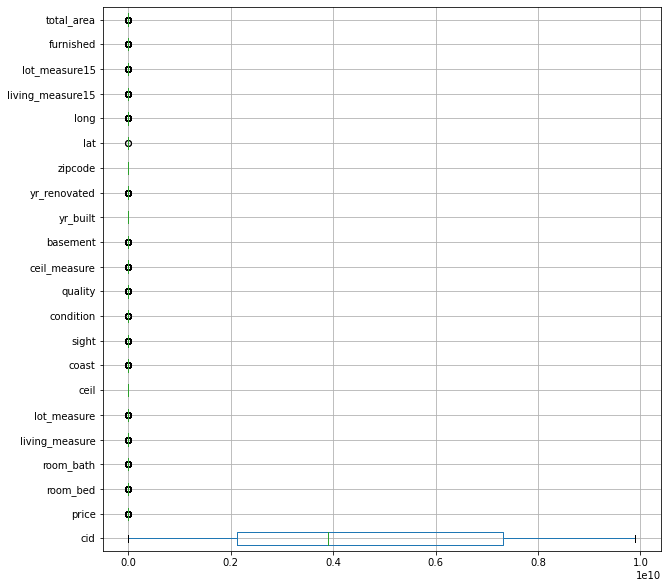

In [49]:
plt.figure(figsize=(10,10))
House.boxplot(vert=0)
plt.show()

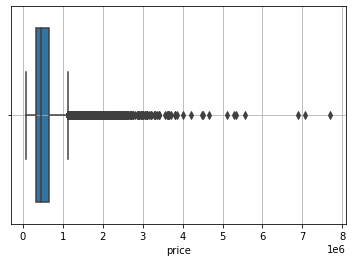

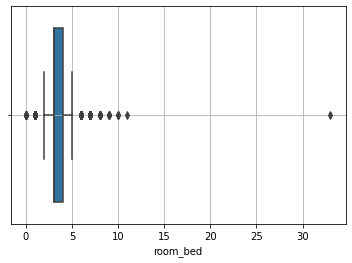

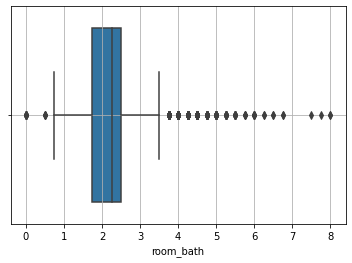

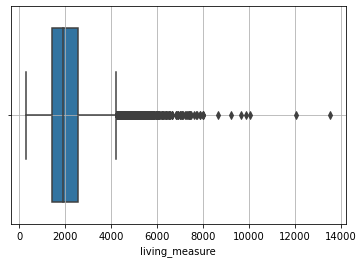

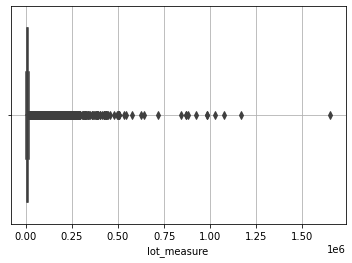

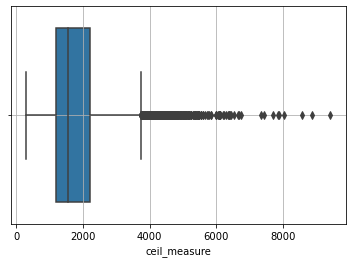

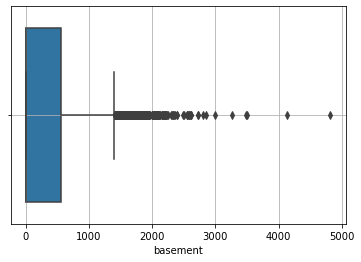

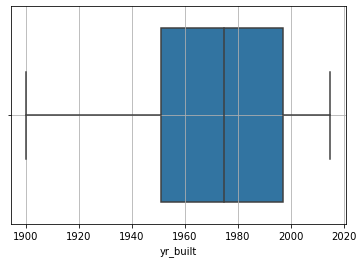

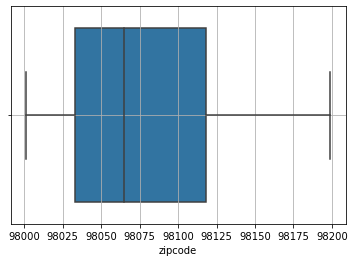

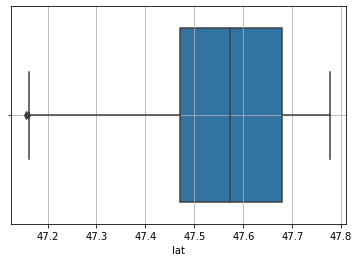

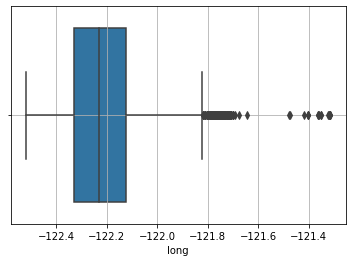

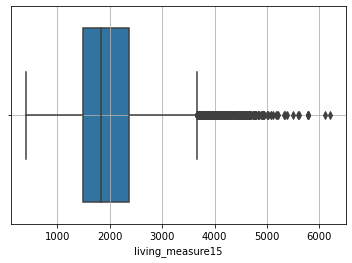

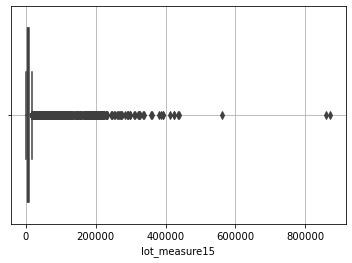

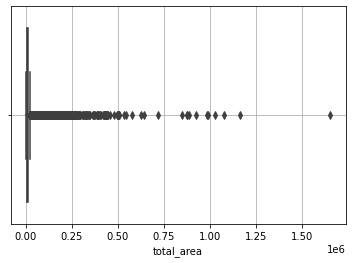

In [50]:
cols=['price','room_bed','room_bath','living_measure','lot_measure','ceil_measure','basement','yr_built','zipcode','lat','long','living_measure15','lot_measure15','total_area']
for i in cols:
    sns.boxplot(House[i],whis=1.5)
    plt.grid()
    plt.show();

# Null value treatment

In [51]:
House.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [52]:
median1=House["living_measure15"].median()
median2=House["room_bed"].median()
median3=House["room_bath"].median()
median4=House["living_measure"].median()
median5=House["lot_measure"].median()
median6=House["lot_measure15"].median()
median7=House["total_area"].median()
median8=House["basement"].median()
median9=House["ceil_measure"].median()
median10=House["quality"].median()
median11=House["condition"].median()
median12=House["coast"].median()
median13=House["sight"].median()
median14=House["furnished"].median()
House["living_measure15"].replace(np.nan,median1,inplace=True)
House["room_bed"].replace(np.nan,median2,inplace=True)
House["room_bath"].replace(np.nan,median3,inplace=True)
House["living_measure"].replace(np.nan,median4,inplace=True)
House["lot_measure"].replace(np.nan,median5,inplace=True)
House["lot_measure15"].replace(np.nan,median6,inplace=True)
House["total_area"].replace(np.nan,median7,inplace=True)
House["basement"].replace(np.nan,median8,inplace=True)
House["ceil_measure"].replace(np.nan,median9,inplace=True)
House["quality"].replace(np.nan,median10,inplace=True)
House["condition"].replace(np.nan,median11,inplace=True)
House["coast"].replace(np.nan,median12,inplace=True)
House["sight"].replace(np.nan,median13,inplace=True)
House["furnished"].replace(np.nan,median14,inplace=True)

In [53]:
House.isnull().sum()

cid                  0
dayhours             0
price                0
room_bed             0
room_bath            0
living_measure       0
lot_measure          0
ceil                42
coast                0
sight                0
condition            0
quality              0
ceil_measure         0
basement             0
yr_built             1
yr_renovated         0
zipcode              0
lat                  0
long                 0
living_measure15     0
lot_measure15        0
furnished            0
total_area           0
dtype: int64

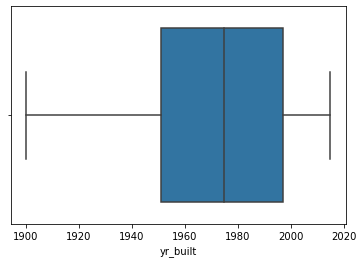

In [54]:
sns.boxplot(House['yr_built']);

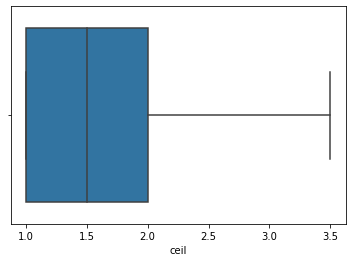

In [55]:
sns.boxplot(House['ceil']);

In [56]:
median15=House['ceil'].median()
House['ceil'].replace(np.nan,median15,inplace=True)
House[House['yr_built']!=np.nan]['yr_built'].astype('float64').mode()
House['yr_built'].replace(np.nan,2014.0,inplace=True)

In [57]:
House.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

# Univariate,Bivariate and Multivariate Analysis

In [58]:
House['room_bed'].value_counts()

3.00     9875
4.00     6854
2.00     2747
5.00     1595
6.00      270
1.00      197
7.00       38
8.00       13
0.00       13
9.00        6
10.00       3
33.00       1
11.00       1
Name: room_bed, dtype: int64

In [59]:
med1=House['room_bed'].median()
House['room_bed'].replace(0.0,med1,inplace=True)

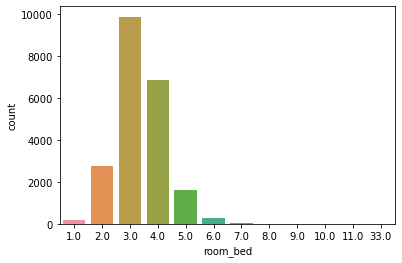

In [60]:
sns.countplot(House['room_bed']);

In [61]:
House[House.room_bed==33]

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
16913,2402100895,20140625T000000,640000,33.00,1.75,1620.00,6000.00,1.00,0.00,0.00,5.00,7.00,1040.00,580.00,1947.00,0,98103,47.69,-122.33,1330.00,4700.00,0.00,7620.00


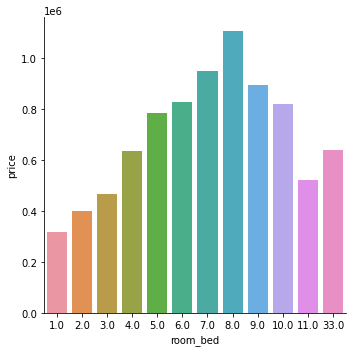

In [62]:
sns.catplot(x="room_bed", y="price", kind='bar',data=House,ci=0);

In [63]:
House['room_bath'].value_counts()

2.50    5358
1.00    3829
1.75    3031
2.25    2147
2.00    1917
1.50    1439
2.75    1178
3.00     750
3.50     726
3.25     588
3.75     155
4.00     135
4.50     100
4.25      78
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.75       2
6.50       2
6.25       2
7.50       1
7.75       1
Name: room_bath, dtype: int64

In [64]:
med2=House['room_bath'].median()
House['room_bath'].replace(0.0,med2,inplace=True)

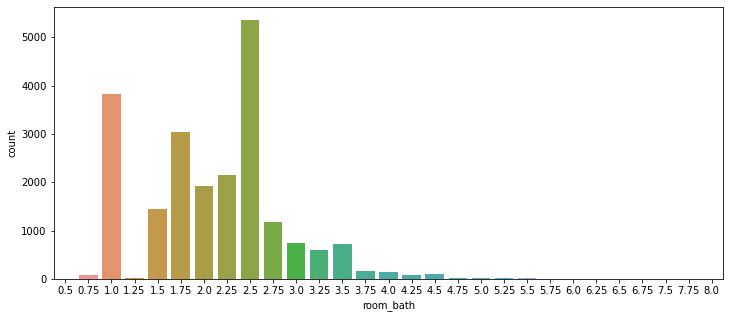

In [65]:
plt.figure(figsize=(12,5))
sns.countplot(x=House['room_bath']);

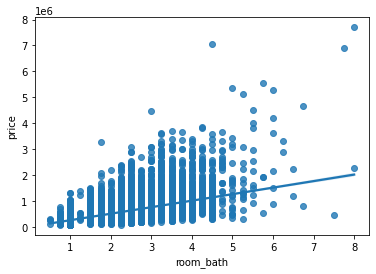

In [66]:
sns.regplot(x='room_bath',y='price',data=House);

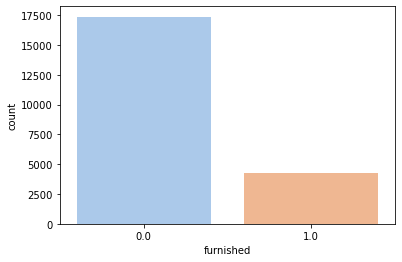

In [67]:
sns.countplot(x='furnished', data=House, palette='pastel');

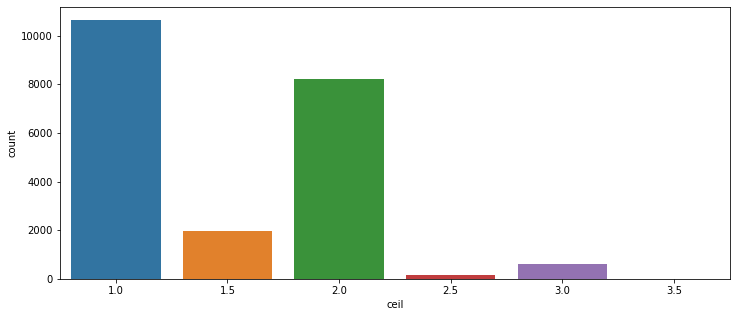

In [68]:
plt.figure(figsize=(12,5))
sns.countplot(x='ceil', data=House);

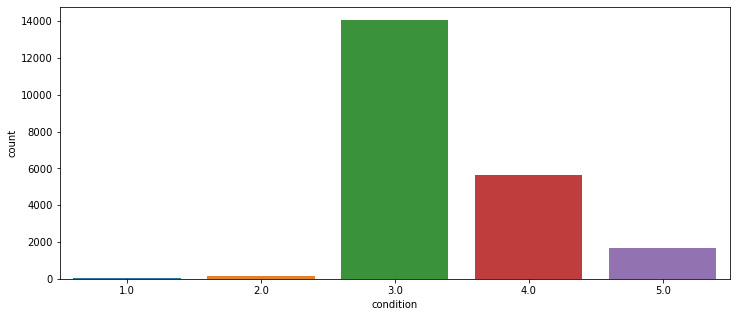

In [69]:
plt.figure(figsize=(12,5))
sns.countplot(x='condition', data=House);

In [70]:
House['condition'].value_counts()

3.00    14063
4.00     5655
5.00     1694
2.00      171
1.00       30
Name: condition, dtype: int64

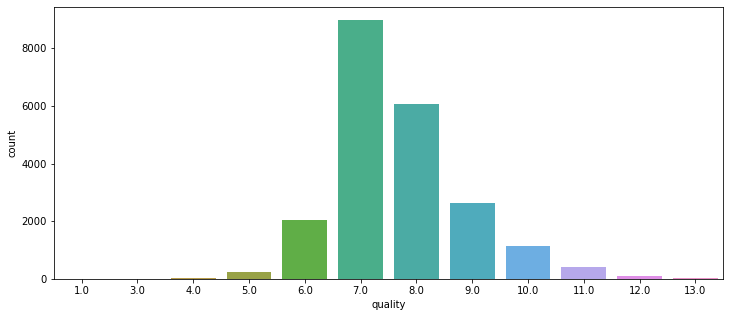

In [71]:
plt.figure(figsize=(12,5))
sns.countplot(x='quality', data=House);

In [72]:
House['quality'].value_counts()

7.00     8982
8.00     6067
9.00     2615
6.00     2038
10.00    1134
11.00     399
5.00      242
12.00      90
4.00       29
13.00      13
3.00        3
1.00        1
Name: quality, dtype: int64

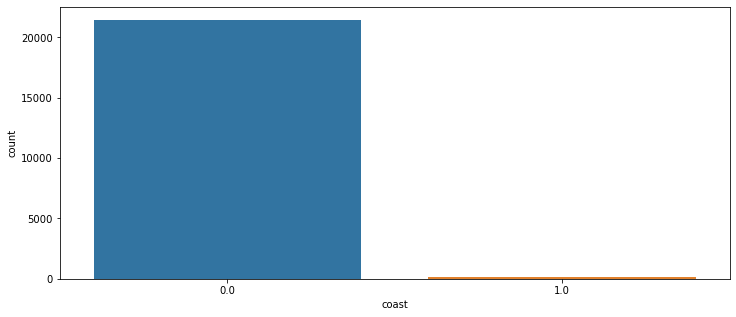

In [73]:
plt.figure(figsize=(12,5))
sns.countplot(x='coast', data=House);

In [74]:
House['coast'].value_counts()

0.00    21452
1.00      161
Name: coast, dtype: int64

In [75]:
House['sight'].value_counts()

0.00    19494
2.00      959
3.00      510
1.00      332
4.00      318
Name: sight, dtype: int64

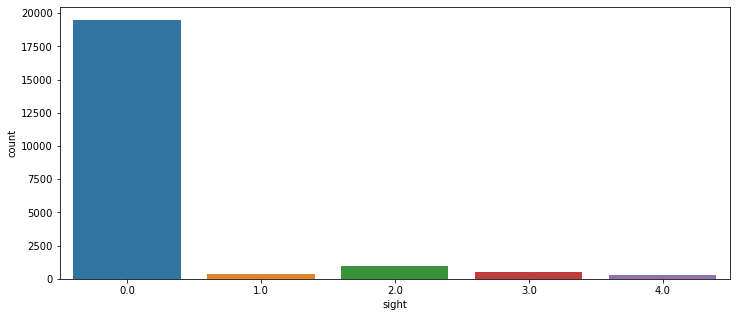

In [76]:
plt.figure(figsize=(12,5))
sns.countplot(x='sight', data=House);

In [77]:
House['basement'].value_counts()

0.00       13126
600.00       221
700.00       218
500.00       214
800.00       206
400.00       184
1000.00      149
900.00       144
300.00       142
200.00       108
530.00       107
480.00       106
750.00       105
450.00       103
720.00       102
620.00        91
580.00        85
840.00        85
420.00        81
1100.00       80
860.00        80
670.00        79
780.00        77
550.00        76
380.00        76
850.00        76
650.00        76
680.00        75
240.00        74
360.00        73
940.00        72
290.00        72
770.00        71
910.00        71
350.00        70
1200.00       70
440.00        69
880.00        69
520.00        69
630.00        68
920.00        68
1010.00       68
740.00        66
760.00        66
730.00        65
960.00        65
560.00        64
430.00        64
340.00        63
640.00        63
280.00        63
950.00        63
460.00        63
790.00        63
820.00        62
570.00        62
1060.00       59
830.00        59
310.00        

In [78]:
House[House['basement']>0].shape

(8487, 23)

In [79]:
House['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2007       35
2000       35
2005       35
2004       26
1990       25
2006       24
2002       22
1989       22
2009       22
1991       20
2001       19
1993       19
1994       19
1998       19
1983       18
1984       18
1987       18
2008       18
2010       18
1985       17
1986       17
1992       17
1999       17
2015       16
1995       16
1996       15
1988       15
1997       15
2011       13
1980       11
1982       11
2012       11
1979       10
1970        9
1977        8
1968        8
1978        6
1975        6
1958        5
1973        5
1981        5
1965        5
1964        5
1963        4
1972        4
1969        4
1960        4
1945        3
1976        3
1957        3
1974        3
1955        3
1956        3
1953        3
1950        2
1946        2
1962        2
1940        2
1971        2
1967        2
1934        1
1944        1
1948        1
1959        1
1951        1
1954        1
Name: yr_renovated, 

# Addition of new variables

In [80]:
House["dayhours"]=pd.to_datetime(House['dayhours'])

In [81]:
House.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,2015-04-27,600000,4.00,1.75,3050.00,9440.00,1.00,0.00,0.00,3.00,8.00,1800.00,1250.00,1966.00,0,98034,47.72,-122.18,2020.00,8660.00,0.00,12490.00
1,3145600250,2015-03-17,190000,2.00,1.00,670.00,3101.00,1.00,0.00,0.00,4.00,6.00,670.00,0.00,1948.00,0,98118,47.55,-122.27,1660.00,4100.00,0.00,3771.00
2,7129303070,2014-08-20,735000,4.00,2.75,3040.00,2415.00,2.00,1.00,4.00,3.00,8.00,3040.00,0.00,1966.00,0,98118,47.52,-122.26,2620.00,2433.00,0.00,5455.00
3,7338220280,2014-10-10,257000,3.00,2.50,1740.00,3721.00,2.00,0.00,0.00,3.00,8.00,1740.00,0.00,2009.00,0,98002,47.34,-122.21,2030.00,3794.00,0.00,5461.00
4,7950300670,2015-02-18,450000,2.00,1.00,1120.00,4590.00,1.00,0.00,0.00,3.00,7.00,1120.00,0.00,1924.00,0,98118,47.57,-122.28,1120.00,5100.00,0.00,5710.00


In [82]:
House['dayhours'].value_counts(normalize=True)

2014-06-23   0.01
2014-06-25   0.01
2014-06-26   0.01
2014-07-08   0.01
2015-04-27   0.01
2015-03-25   0.01
2015-04-14   0.01
2015-04-28   0.01
2015-04-22   0.01
2014-07-09   0.01
2014-06-24   0.01
2015-04-21   0.01
2014-08-26   0.01
2014-10-28   0.01
2014-05-20   0.01
2014-07-14   0.01
2014-07-01   0.01
2015-04-29   0.01
2014-08-20   0.01
2014-06-17   0.01
2015-04-08   0.01
2014-07-29   0.01
2014-05-28   0.01
2014-07-16   0.01
2015-04-23   0.01
2014-08-05   0.01
2014-08-25   0.01
2015-03-27   0.01
2014-08-11   0.00
2014-06-20   0.00
2014-07-23   0.00
2014-07-22   0.00
2015-03-26   0.00
2014-05-27   0.00
2014-06-03   0.00
2014-08-22   0.00
2015-04-02   0.00
2014-09-23   0.00
2015-04-24   0.00
2015-04-07   0.00
2014-07-25   0.00
2014-08-27   0.00
2014-07-15   0.00
2015-05-04   0.00
2015-03-24   0.00
2014-06-19   0.00
2015-03-04   0.00
2014-11-13   0.00
2014-06-04   0.00
2014-07-18   0.00
2014-08-12   0.00
2014-09-24   0.00
2014-06-18   0.00
2015-02-24   0.00
2014-06-10   0.00
2014-07-21

In [83]:
import math
House['age']=float(0)
for index,row in House.iterrows():
    House.at[index,'age']=abs(float(row['dayhours'].strftime('%Y'))-float(row['yr_built']))
    
House.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,age
0,3876100940,2015-04-27,600000,4.00,1.75,3050.00,9440.00,1.00,0.00,0.00,3.00,8.00,1800.00,1250.00,1966.00,0,98034,47.72,-122.18,2020.00,8660.00,0.00,12490.00,49.00
1,3145600250,2015-03-17,190000,2.00,1.00,670.00,3101.00,1.00,0.00,0.00,4.00,6.00,670.00,0.00,1948.00,0,98118,47.55,-122.27,1660.00,4100.00,0.00,3771.00,67.00
2,7129303070,2014-08-20,735000,4.00,2.75,3040.00,2415.00,2.00,1.00,4.00,3.00,8.00,3040.00,0.00,1966.00,0,98118,47.52,-122.26,2620.00,2433.00,0.00,5455.00,48.00
3,7338220280,2014-10-10,257000,3.00,2.50,1740.00,3721.00,2.00,0.00,0.00,3.00,8.00,1740.00,0.00,2009.00,0,98002,47.34,-122.21,2030.00,3794.00,0.00,5461.00,5.00
4,7950300670,2015-02-18,450000,2.00,1.00,1120.00,4590.00,1.00,0.00,0.00,3.00,7.00,1120.00,0.00,1924.00,0,98118,47.57,-122.28,1120.00,5100.00,0.00,5710.00,91.00


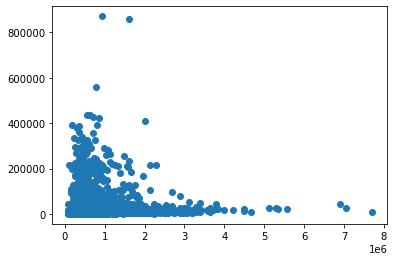

In [84]:
plt.scatter(House['price'],House['lot_measure15']);

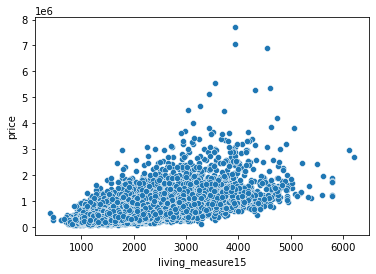

In [85]:
sns.scatterplot(x=House['living_measure15'], y= House['price']);

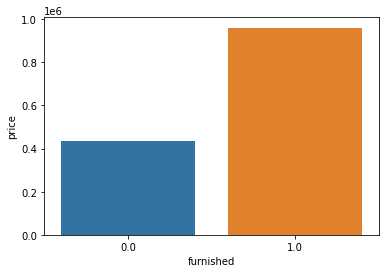

In [86]:
sns.barplot(x=House['furnished'], y= House['price'],ci=0);

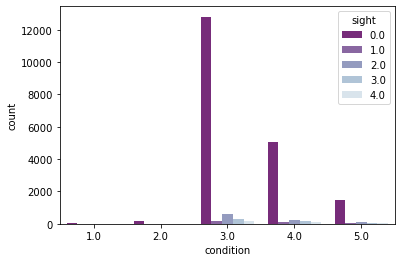

In [87]:
sns.countplot(House.condition,hue=House.sight,palette='BuPu_r')
plt.show()

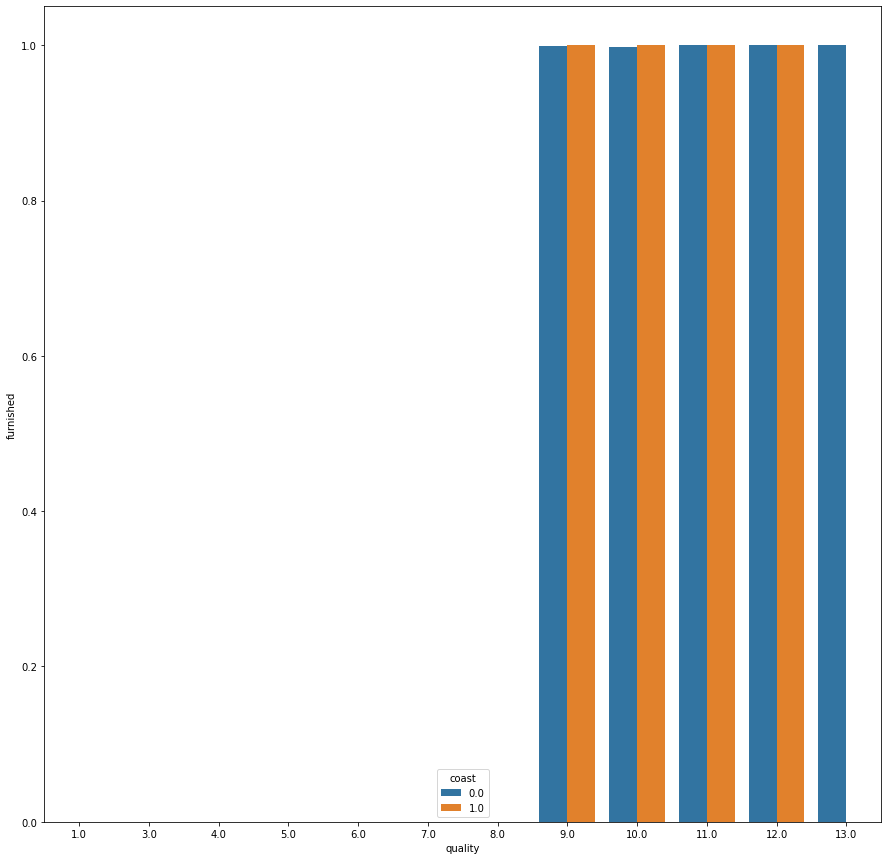

In [88]:
plt.figure(figsize=(15,15))
sns.barplot(House.quality,House.furnished, hue=House.coast,ci=False)
plt.show()

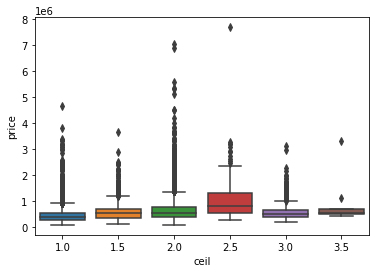

In [89]:
sns.boxplot(x='ceil', y = 'price', data=House);

In [90]:
pd.crosstab(House.furnished, House.condition, margins=True, normalize=True)

condition,1.0,2.0,3.0,4.0,5.0,All
furnished,,,,,,
0.0,0.00,0.01,0.49,0.23,0.07,0.80
1.0,0.00,0.00,0.16,0.03,0.01,0.20
All,0.00,0.01,0.65,0.26,0.08,1.00


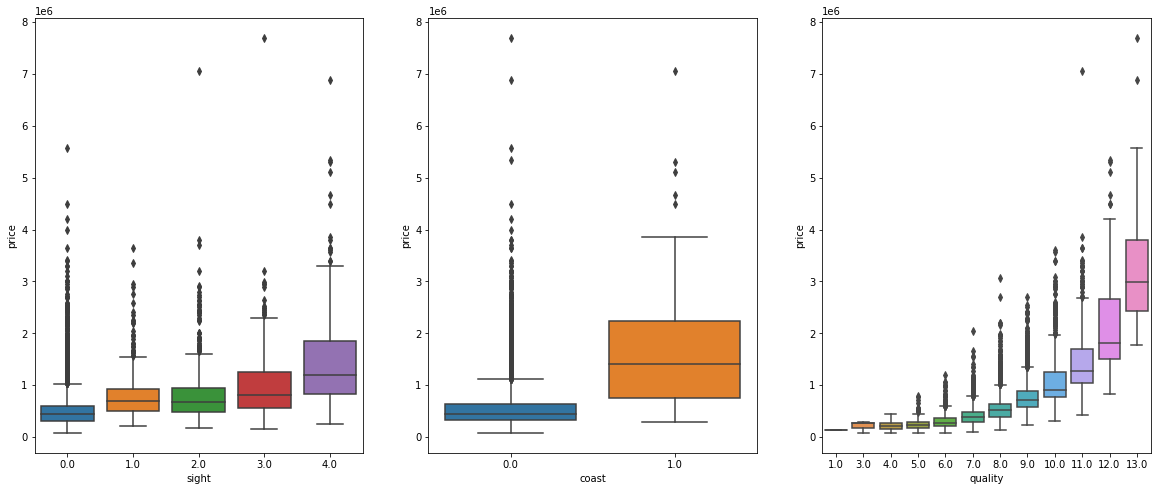

In [91]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(20,8))
sns.boxplot(x='sight', y='price', data=House, ax=axs[0])
sns.boxplot(x='coast', y='price', data=House, ax=axs[1])
sns.boxplot(x='quality', y='price', data=House, ax=axs[2]);

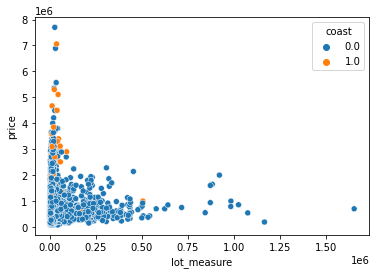

In [92]:
sns.scatterplot(x='lot_measure', y='price', hue='coast', data=House);

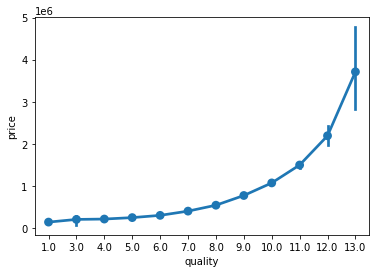

In [93]:
sns.pointplot(x='quality', y='price', data=House);

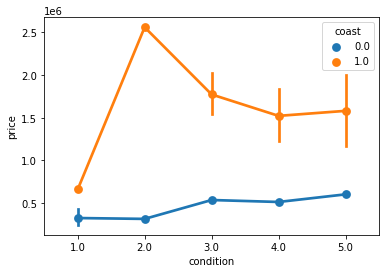

In [94]:
sns.pointplot(x='condition', y='price', data=House, hue='coast');

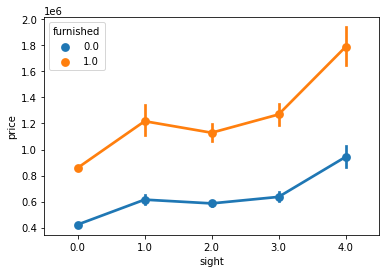

In [95]:
sns.pointplot(x='sight', y='price', data=House, hue='furnished');

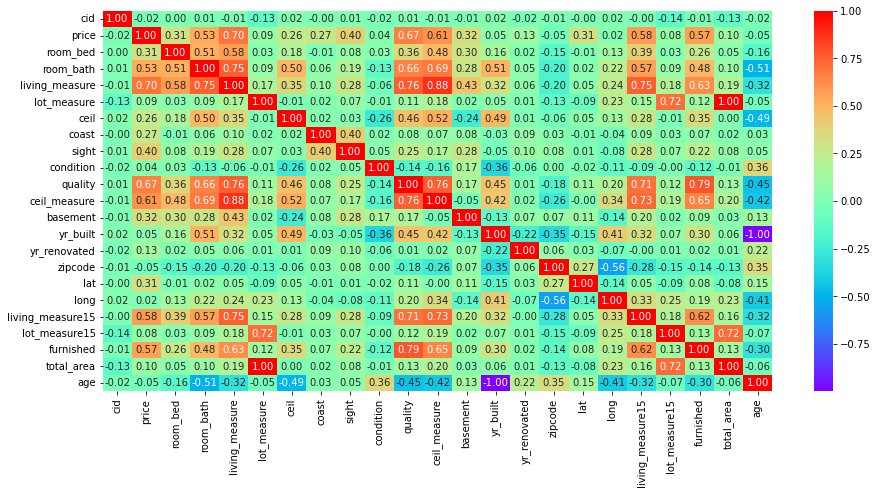

In [96]:
plt.figure(figsize=(15,7))
sns.heatmap(House.corr(),annot=True,fmt='.2f',cmap='rainbow')
plt.show()

<Figure size 1584x1584 with 0 Axes>

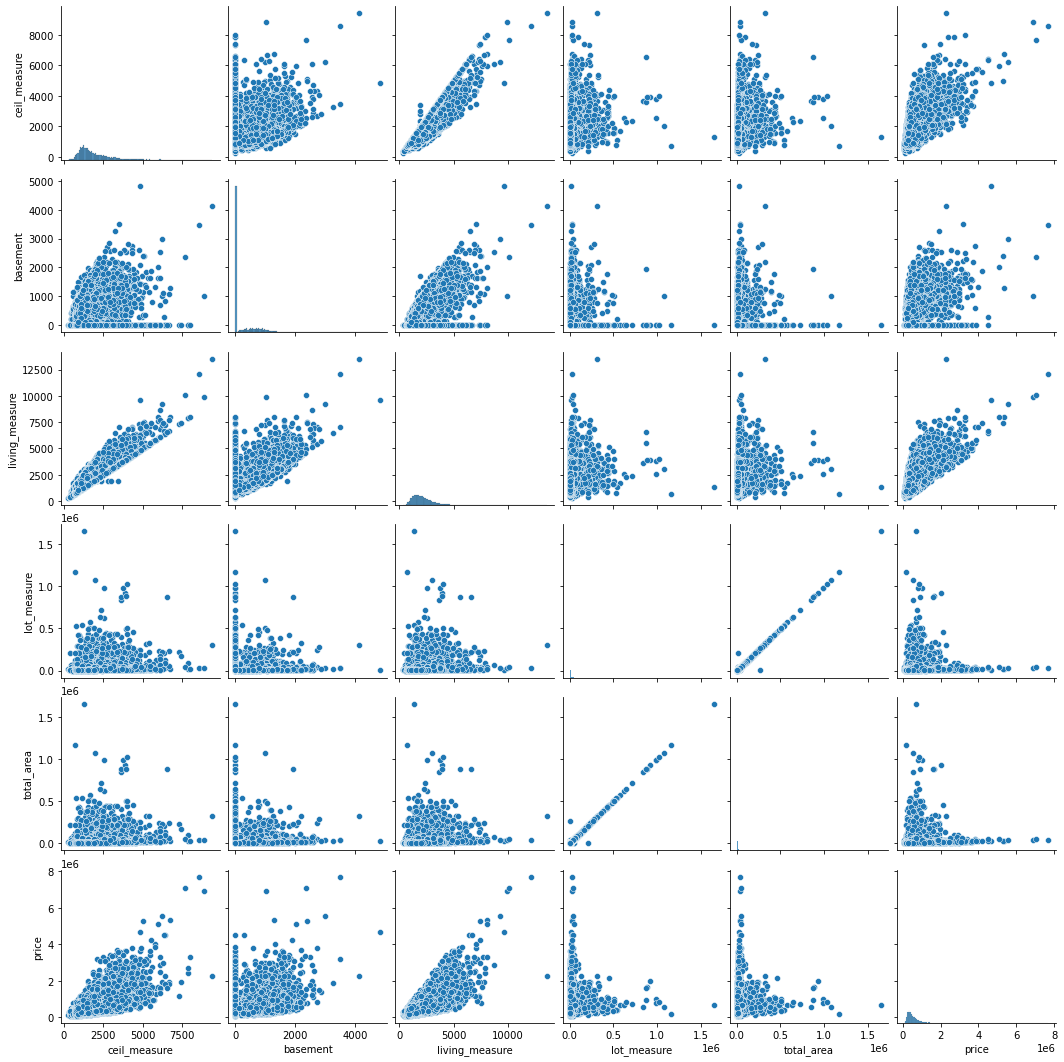

In [97]:
plt.figure(figsize=(22,22))
sns.pairplot(House[['ceil_measure','basement','living_measure','lot_measure','total_area','price']])
plt.show();

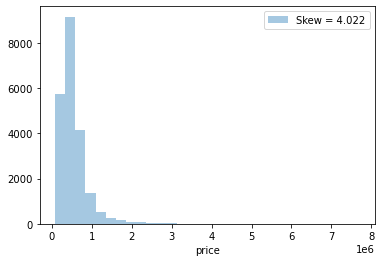

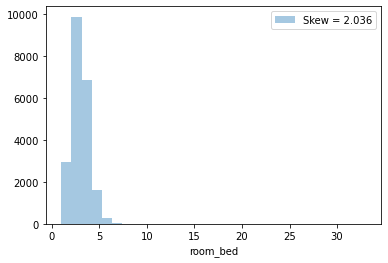

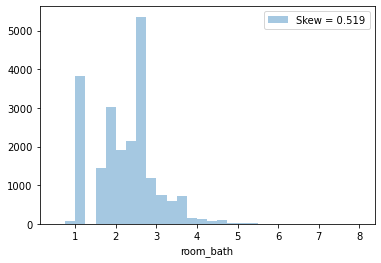

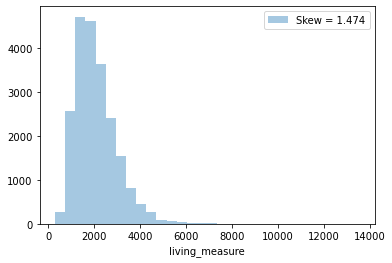

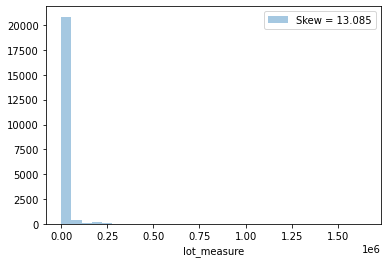

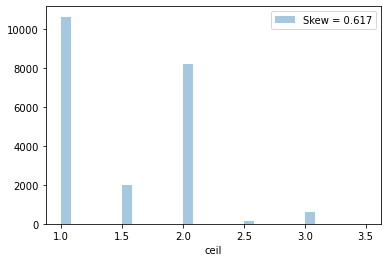

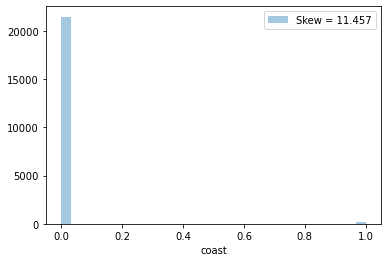

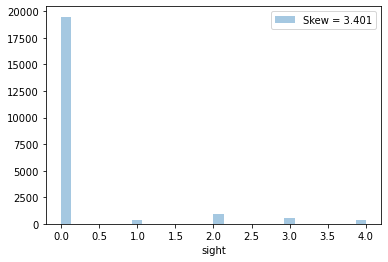

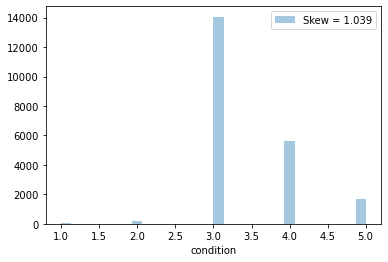

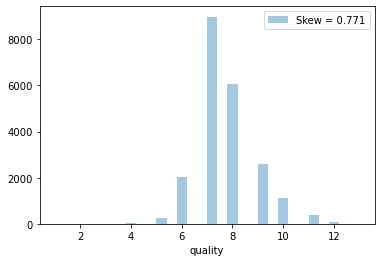

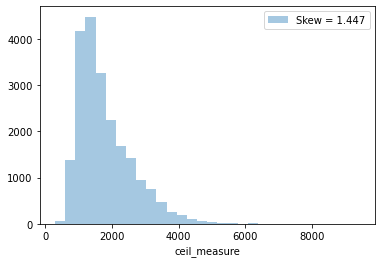

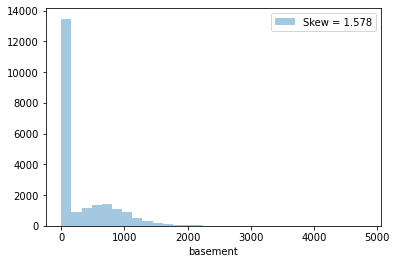

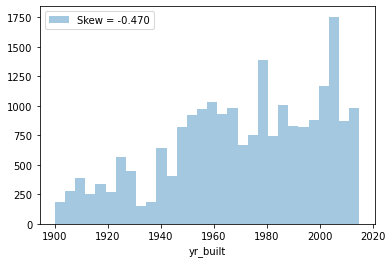

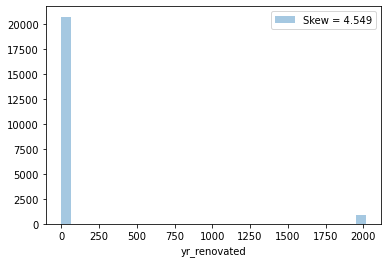

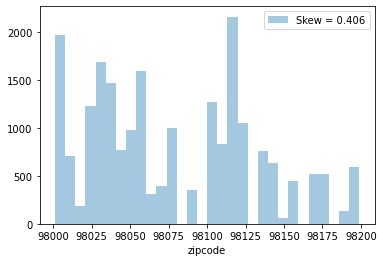

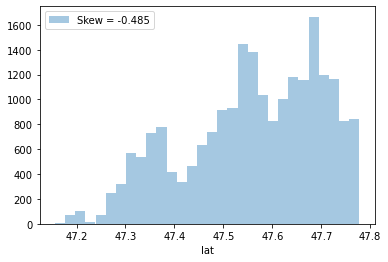

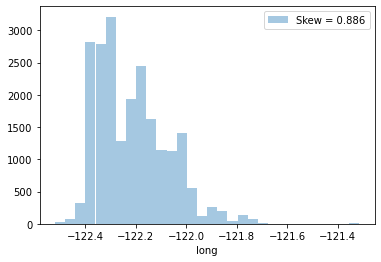

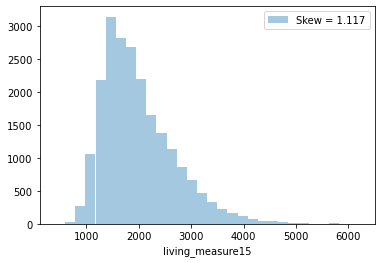

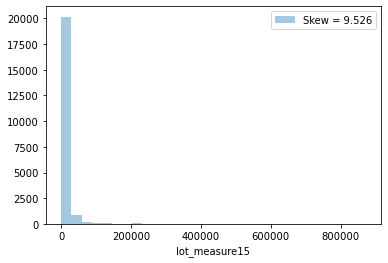

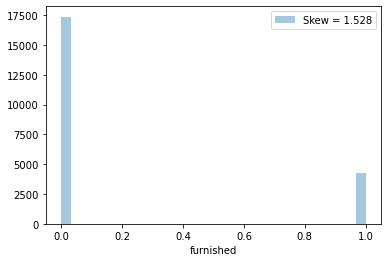

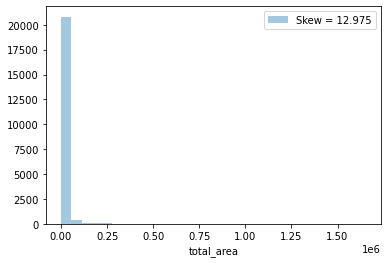

In [98]:
features = House.columns[2:-1].tolist()
for feat in features:
    skew = House[feat].skew()
    sns.distplot(House[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [99]:
House.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,age
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540182.16,3.37,2.12,2079.73,15090.03,1.49,0.01,0.23,3.41,7.66,1788.36,291.51,1971.04,84.40,98077.94,47.56,-122.21,1985.94,12759.64,0.20,17168.08,43.28
std,2876565571.31,367362.23,0.92,0.77,918.15,41384.66,0.54,0.09,0.77,0.65,1.18,828.08,442.58,29.39,401.68,53.51,0.14,0.14,683.00,27269.32,0.40,41565.34,29.39
min,1000102.00,75000.00,1.00,0.50,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00,0.00,1423.00,0.00
25%,2123049194.00,321950.00,3.00,1.75,1430.00,5043.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,0.00,7040.00,18.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00,0.00,9575.00,39.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10660.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10080.00,0.00,12970.00,63.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00,1.00,1652659.00,115.00


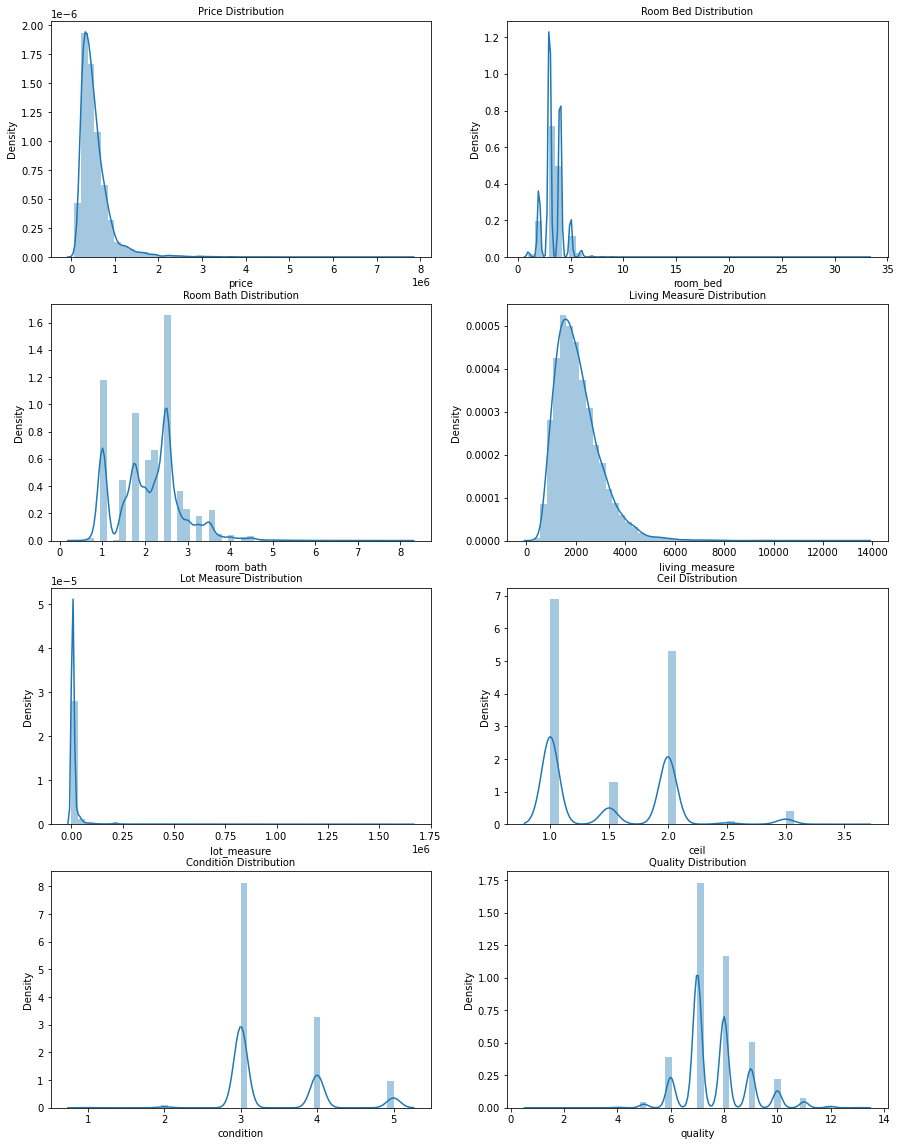

In [100]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,20)
a = sns.distplot(House['price'] , ax=axes[0][0])
a.set_title("Price Distribution",fontsize=10)

a = sns.distplot(House['room_bed'] , ax=axes[0][1])
a.set_title("Room Bed Distribution",fontsize=10)

a = sns.distplot(House['room_bath'] , ax=axes[1][0])
a.set_title("Room Bath Distribution",fontsize=10)

a = sns.distplot(House['living_measure'] , ax=axes[1][1])
a.set_title("Living Measure Distribution",fontsize=10)


a = sns.distplot(House['lot_measure'] , ax=axes[2][0])
a.set_title("Lot Measure Distribution",fontsize=10)

a = sns.distplot(House['ceil'] , ax=axes[2][1])
a.set_title("Ceil Distribution",fontsize=10)


a = sns.distplot(House['condition'] , ax=axes[3][0])
a.set_title("Condition Distribution",fontsize=10)

a = sns.distplot(House['quality'] , ax=axes[3][1])
a.set_title("Quality Distribution",fontsize=10)

plt.show()

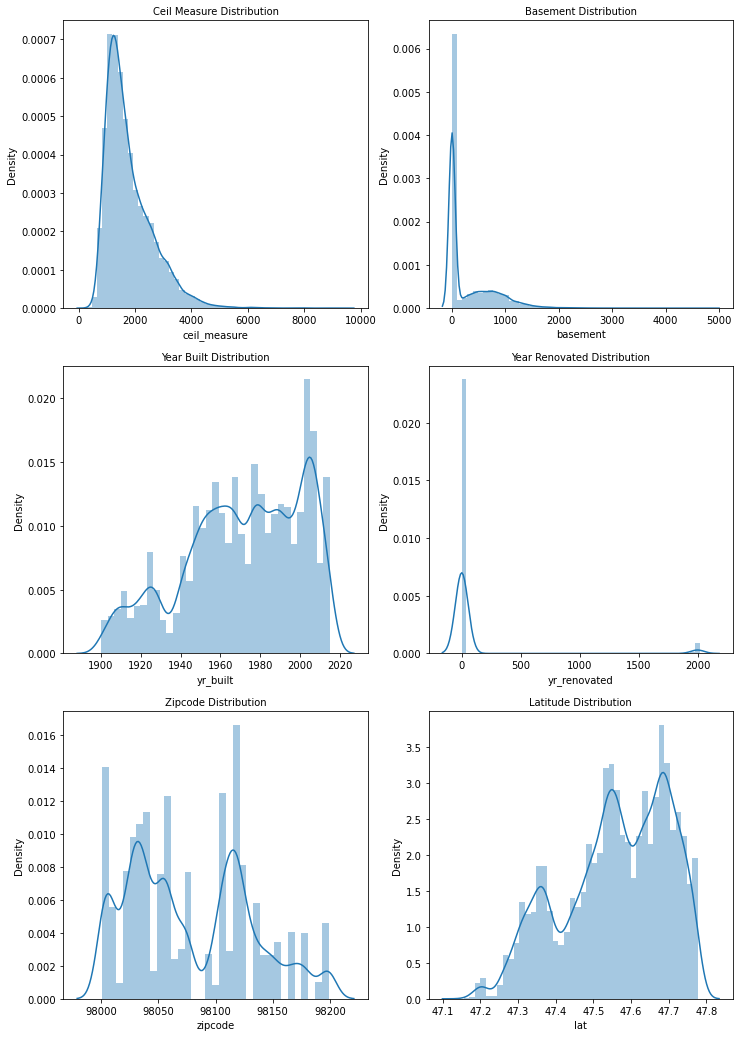

In [101]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,18)
a = sns.distplot(House['ceil_measure'] , ax=axes[0][0])
a.set_title("Ceil Measure Distribution",fontsize=10)

a = sns.distplot(House['basement'] , ax=axes[0][1])
a.set_title("Basement Distribution",fontsize=10)

a = sns.distplot(House['yr_built'] , ax=axes[1][0])
a.set_title("Year Built Distribution",fontsize=10)

a = sns.distplot(House['yr_renovated'] , ax=axes[1][1])
a.set_title("Year Renovated Distribution",fontsize=10)

a = sns.distplot(House['zipcode'] , ax=axes[2][0])
a.set_title("Zipcode Distribution",fontsize=10)

a = sns.distplot(House['lat'] , ax=axes[2][1])
a.set_title("Latitude Distribution",fontsize=10)
plt.show()

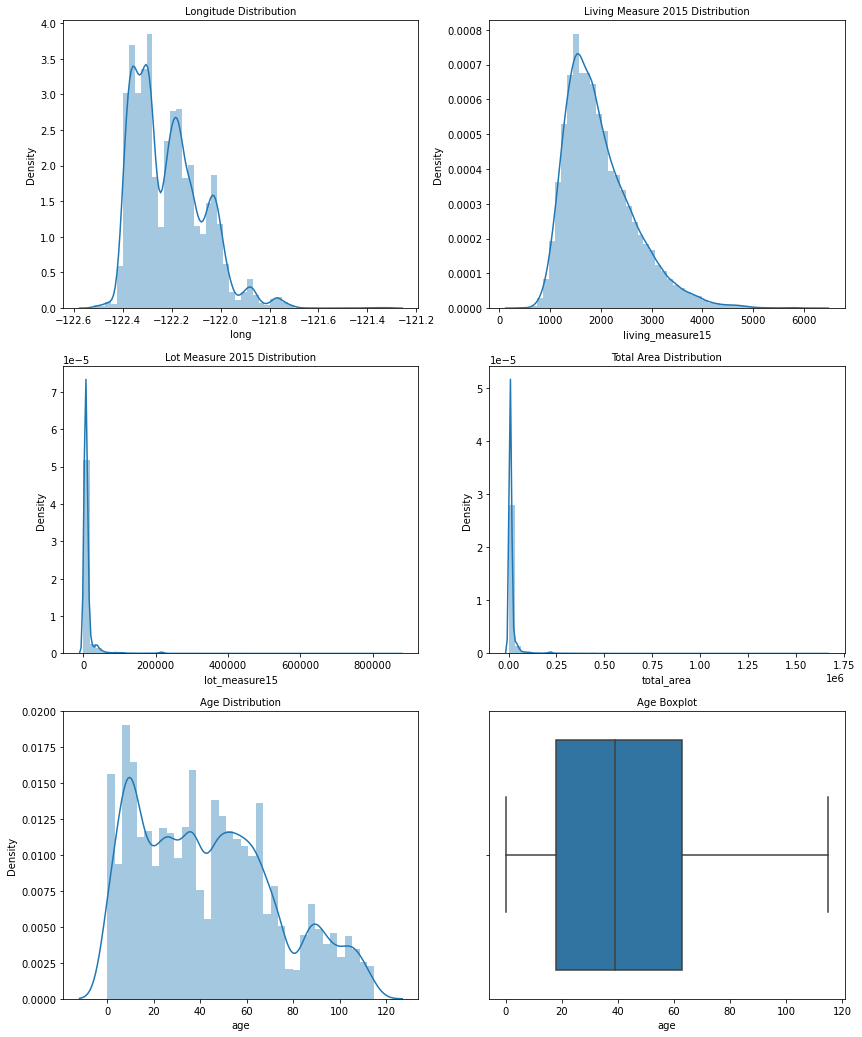

In [102]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(14,18)
a = sns.distplot(House['long'] , ax=axes[0][0])
a.set_title("Longitude Distribution",fontsize=10)

a = sns.distplot(House['living_measure15'] , ax=axes[0][1])
a.set_title("Living Measure 2015 Distribution",fontsize=10)

a = sns.distplot(House['lot_measure15'] , ax=axes[1][0])
a.set_title("Lot Measure 2015 Distribution",fontsize=10)


a = sns.distplot(House['total_area'] , ax=axes[1][1])
a.set_title("Total Area Distribution",fontsize=10)

a = sns.distplot(House['age'], ax=axes[2][0])
a.set_title("Age Distribution",fontsize=10)

a = sns.boxplot(House['age'], ax=axes[2][1])
a.set_title("Age Boxplot",fontsize=10)


plt.show()

# Outlier treatment

In [103]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [104]:
col=['ceil_measure','basement','living_measure','lot_measure','room_bed']
for column in House[col].columns:
    lr,ur=remove_outlier(House[column])
    House[column]=np.where(House[column]>ur,ur,House[column])
    House[column]=np.where(House[column]<lr,lr,House[column])

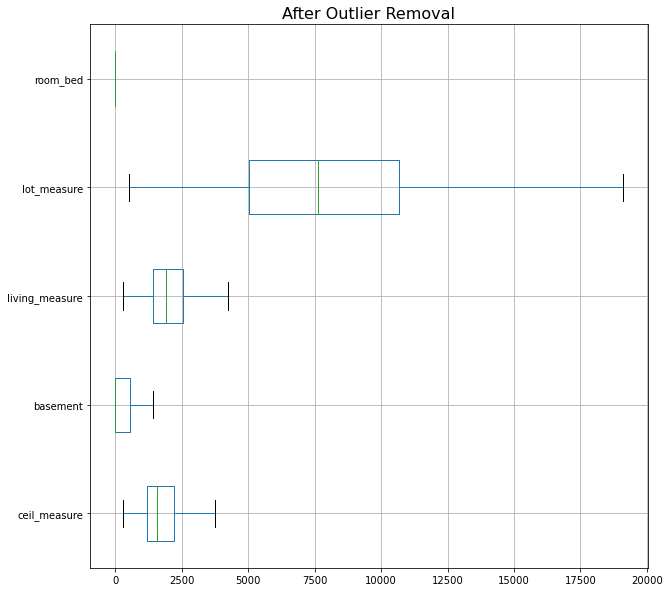

In [105]:
plt.figure(figsize=(10,10))
House[col].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

# Dropping unwanted variables

In [106]:
House = House.drop(['cid','dayhours','yr_renovated','lat','long'], axis=1)
House.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,zipcode,living_measure15,lot_measure15,furnished,total_area,age
0,600000,4.00,1.75,3050.00,9440.00,1.00,0.00,0.00,3.00,8.00,1800.00,1250.00,1966.00,98034,2020.00,8660.00,0.00,12490.00,49.00
1,190000,2.00,1.00,670.00,3101.00,1.00,0.00,0.00,4.00,6.00,670.00,0.00,1948.00,98118,1660.00,4100.00,0.00,3771.00,67.00
2,735000,4.00,2.75,3040.00,2415.00,2.00,1.00,4.00,3.00,8.00,3040.00,0.00,1966.00,98118,2620.00,2433.00,0.00,5455.00,48.00
3,257000,3.00,2.50,1740.00,3721.00,2.00,0.00,0.00,3.00,8.00,1740.00,0.00,2009.00,98002,2030.00,3794.00,0.00,5461.00,5.00
4,450000,2.00,1.00,1120.00,4590.00,1.00,0.00,0.00,3.00,7.00,1120.00,0.00,1924.00,98118,1120.00,5100.00,0.00,5710.00,91.00


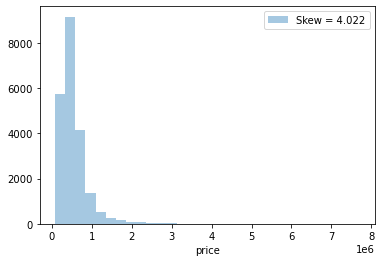

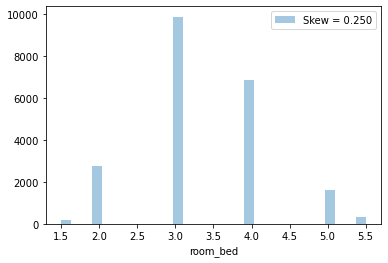

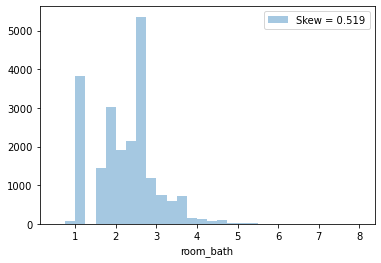

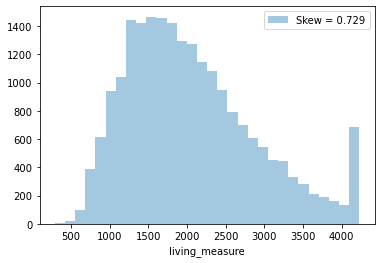

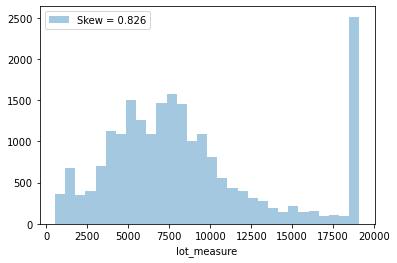

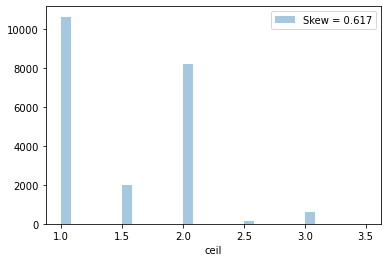

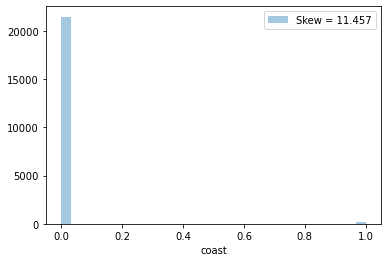

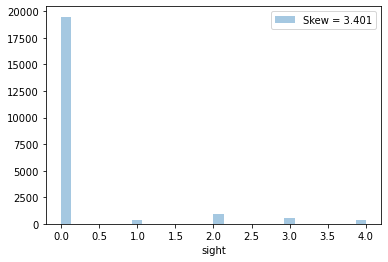

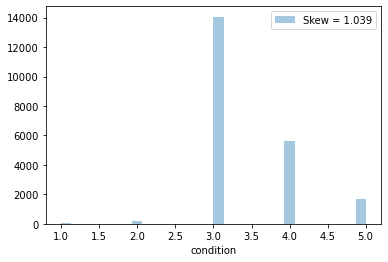

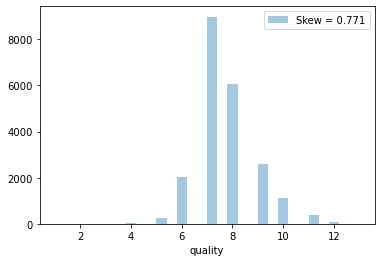

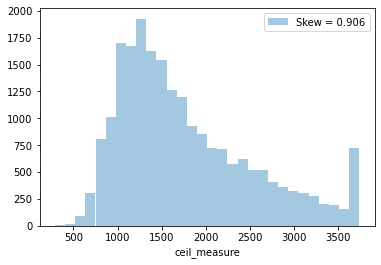

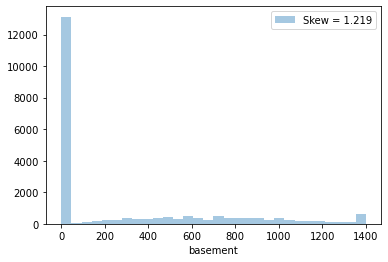

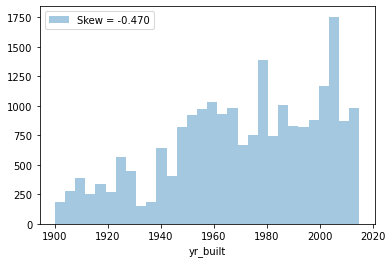

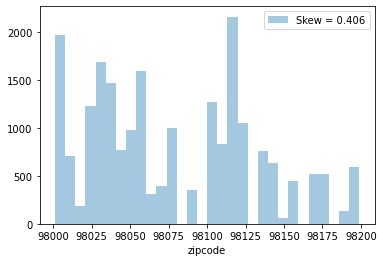

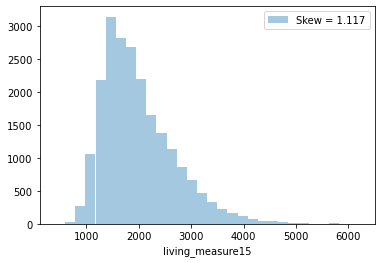

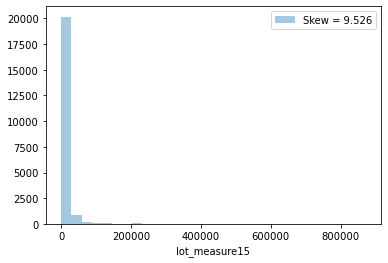

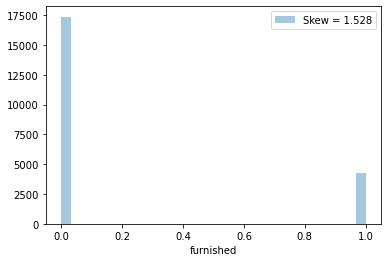

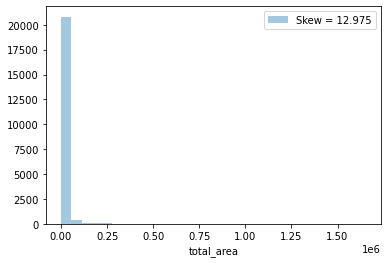

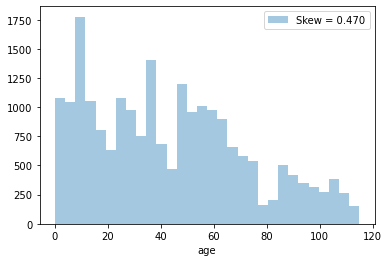

In [107]:
features = House.columns.tolist()
for feat in features:
    skew = House[feat].skew()
    sns.distplot(House[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

# Scaling

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(House)
data_standard=scaler.transform(House)
data_standard=pd.DataFrame(data_standard, columns=House.columns)
data_standard.describe()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,zipcode,living_measure15,lot_measure15,furnished,total_area,age
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.27,-2.19,-2.11,-2.11,-1.63,-0.92,-0.09,-0.31,-3.70,-5.66,-1.94,-0.68,-2.42,-1.44,-2.32,-0.44,-0.49,-0.38,-1.47
25%,-0.59,-0.43,-0.48,-0.75,-0.73,-0.92,-0.09,-0.31,-0.63,-0.56,-0.76,-0.68,-0.68,-0.84,-0.73,-0.28,-0.49,-0.24,-0.86
50%,-0.25,-0.43,0.17,-0.18,-0.21,0.01,-0.09,-0.31,-0.63,-0.56,-0.27,-0.68,0.13,-0.24,-0.21,-0.19,-0.49,-0.18,-0.15
75%,0.29,0.75,0.50,0.59,0.39,0.94,-0.09,-0.31,0.91,0.29,0.58,0.66,0.88,0.75,0.55,-0.10,-0.49,-0.10,0.67
max,19.49,2.51,7.67,2.59,2.07,3.72,11.54,4.92,2.45,4.55,2.58,2.68,1.50,2.26,6.18,31.48,2.02,39.35,2.44


# Variable transformation

In [109]:
print("skewness of price is",House['price'].skew())
print("kurtosis of price is ", House['price'].kurtosis())

skewness of price is 4.021715573048685
kurtosis of price is  34.522444410072566


0.42896927192344847
0.6925110496469404


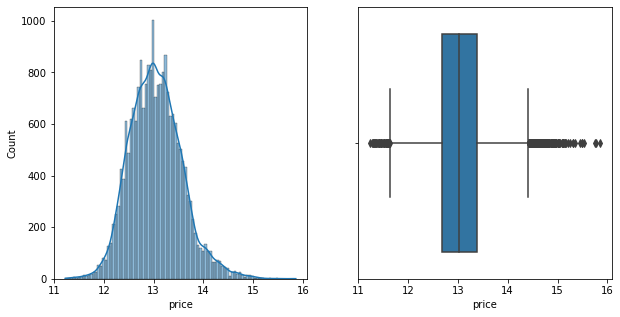

In [110]:
print(np.log(House['price']).skew())
print(np.log(House['price']).kurtosis())

fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(np.log(House['price']), kde=True, ax = axs[0])
sns.boxplot(x= np.log(House['price']), ax = axs[1])
plt.show()

In [111]:
print("skewness of living measure15 is",House['living_measure15'].skew())
print("kurtosis of living measure15 is ", House['living_measure15'].kurtosis())

skewness of living measure15 is 1.1165534584934207
kurtosis of living measure15 is  1.6386817563332663


0.20804827757613345
-0.18443487981249485


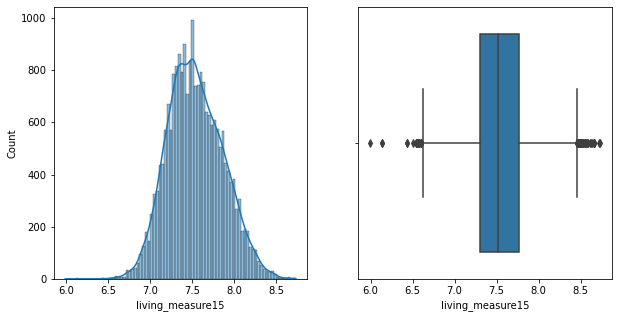

In [112]:
print(np.log(House['living_measure15']).skew())
print(np.log(House['living_measure15']).kurtosis())

fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(np.log(House['living_measure15']), kde=True, ax = axs[0])
sns.boxplot(x= np.log(House['living_measure15']), ax = axs[1])
plt.show()

In [113]:
print("skewness of lot measure15 is",House['lot_measure15'].skew())
print("kurtosis of lot measure15 is ", House['lot_measure15'].kurtosis())

skewness of lot measure15 is 9.525543235241692
kurtosis of lot measure15 is  151.4249801455331


0.9655047963378206
3.564341198904012


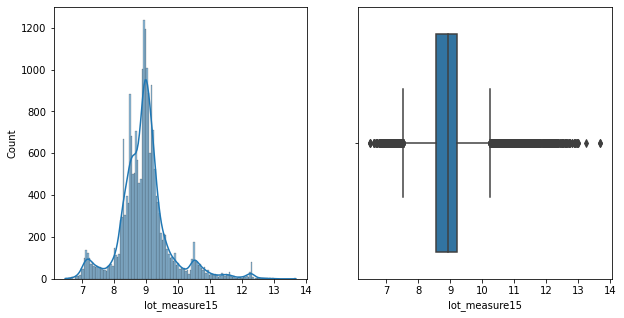

In [114]:
print(np.log(House['lot_measure15']).skew())
print(np.log(House['lot_measure15']).kurtosis())

fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(np.log(House['lot_measure15']), kde=True, ax = axs[0])
sns.boxplot(x=np.log(House['lot_measure15']), ax = axs[1])
plt.show()

In [115]:
print("skewness of total area is",House['total_area'].skew())
print("kurtosis of total area is ", House['total_area'].kurtosis())

skewness of total area is 12.974600663184283
kurtosis of total area is  281.8660006101573


1.4621411128133024
4.536103461248975


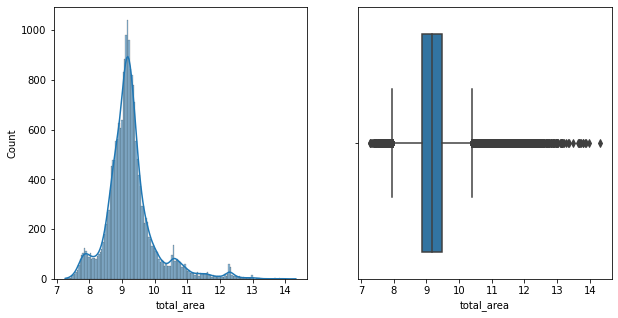

In [116]:
print(np.log(House['total_area']).skew())
print(np.log(House['total_area']).kurtosis())

fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(np.log(House['total_area']), kde=True, ax = axs[0])
sns.boxplot(x=np.log(House['total_area']), ax = axs[1])
plt.show()

In [117]:
print("skewness of basement is",House['basement'].skew())
print("kurtosis of basement is ", House['basement'].kurtosis())

skewness of basement is 1.2190205370626637
kurtosis of basement is  0.1936347042820441


In [118]:
House['coast']=House['coast'].astype('int64')
House['furnished']=House['furnished'].astype('int64')
House['room_bed']=House['room_bed'].astype('int64')
House['sight']=House['sight'].astype('int64')
House['condition']=House['condition'].astype('int64')
House['quality']=House['quality'].astype('int64')
House['yr_built']=House['yr_built'].astype('int64')

# Dummy Encoding

In [119]:
House = pd.get_dummies(House, columns=['coast','furnished'],drop_first=True)

In [120]:
House.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,sight,condition,quality,ceil_measure,basement,yr_built,zipcode,living_measure15,lot_measure15,total_area,age,coast_1,furnished_1
0,600000,4,1.75,3050.00,9440.00,1.00,0,3,8,1800.00,1250.00,1966,98034,2020.00,8660.00,12490.00,49.00,0,0
1,190000,2,1.00,670.00,3101.00,1.00,0,4,6,670.00,0.00,1948,98118,1660.00,4100.00,3771.00,67.00,0,0
2,735000,4,2.75,3040.00,2415.00,2.00,4,3,8,3040.00,0.00,1966,98118,2620.00,2433.00,5455.00,48.00,1,0
3,257000,3,2.50,1740.00,3721.00,2.00,0,3,8,1740.00,0.00,2009,98002,2030.00,3794.00,5461.00,5.00,0,0
4,450000,2,1.00,1120.00,4590.00,1.00,0,3,7,1120.00,0.00,1924,98118,1120.00,5100.00,5710.00,91.00,0,0


# Clustering

In [121]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 2)
k_means.fit(data_standard)
k_means.labels_

array([0, 0, 1, ..., 1, 0, 1])

In [122]:
k_means.inertia_

317630.4516066758

In [123]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_standard)
k_means.inertia_

278883.4491987214

In [124]:
k_means = KMeans(n_clusters = 4)
k_means.fit(data_standard)
k_means.inertia_

254522.2745915218

In [125]:
k_means = KMeans(n_clusters = 1)
k_means.fit(data_standard)
k_means.inertia_

410646.99999999814

In [126]:
k_means = KMeans(n_clusters = 5)
k_means.fit(data_standard)
k_means.inertia_

232452.32390216435

In [127]:
k_means = KMeans(n_clusters = 6)
k_means.fit(data_standard)
k_means.inertia_

209293.18551600736

In [128]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(data_standard)
    wss.append(KM.inertia_)

In [129]:
wss

[410646.99999999814,
 317630.4516066758,
 278883.45842459303,
 255258.49696679896,
 232444.39293247805,
 209293.96309870444,
 195976.30242210225,
 185278.7798722161,
 176913.1390355133,
 169385.10306103915]

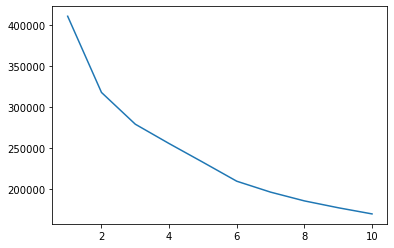

In [130]:
plt.plot(range(1,11), wss);

In [131]:
k_means = KMeans(n_clusters = 2)
k_means.fit(data_standard)
labels = k_means.labels_

In [132]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(data_standard,labels)

0.28702621776548126

In [133]:
silhouette_samples(data_standard,labels).min()

-0.14114087233536252

In [134]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(data_standard)
labels = k_means.labels_

In [135]:
silhouette_score(data_standard,labels,random_state=1)

0.1774270532196686

# Model building

In [136]:
X = House.drop("price" , axis=1)

y = House.pop("price")
print(X.shape)
print(y.shape)

(21613, 18)
(21613,)


In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
print("Size of training data:",X_train.shape)
print("Size of testing data:",X_test.shape)

Size of training data: (15129, 18)
Size of testing data: (6484, 18)


# Linear Regression

In [138]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [139]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for room_bed is -34806.144951600414
The coefficient for room_bath is 83989.83560090853
The coefficient for living_measure is -168.58103054989644
The coefficient for lot_measure is -3.183893847035519
The coefficient for ceil is 14654.5501085267
The coefficient for sight is 47097.93722334335
The coefficient for condition is 21079.557098945275
The coefficient for quality is 124422.21857804495
The coefficient for ceil_measure is 263.06414423957824
The coefficient for basement is 277.06796917996263
The coefficient for yr_built is 20109.851896227156
The coefficient for zipcode is -63.945685147964255
The coefficient for living_measure15 is 61.894535051169534
The coefficient for lot_measure15 is -0.21667032576561593
The coefficient for total_area is 0.12454014398876824
The coefficient for age is 23959.74012965555
The coefficient for coast_1 is 587648.1976990167
The coefficient for furnished_1 is 48558.24287536434


In [140]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -35286768.016887285


In [141]:
linear_acc_train=regression_model.score(X_train, y_train)
print ('Linear regression base model training score:' ,round((linear_acc_train*100),2),'%')

Linear regression base model training score: 63.25 %


In [142]:
linear_acc_test=regression_model.score(X_test, y_test)
print ('Linear regression base model testing score:' ,round((linear_acc_test*100),2),'%')

Linear regression base model testing score: 64.84 %


In [143]:
linear_mse_train = np.mean((regression_model.predict(X_train)-y_train)**2)
print("Mean squared error of Linear regression base training model:",linear_mse_train)

Mean squared error of Linear regression base training model: 49625433837.52597


In [144]:
linear_mse_test = np.mean((regression_model.predict(X_test)-y_test)**2)
print("Mean squared error of Linear regression base testing model:",linear_mse_test)

Mean squared error of Linear regression base testing model: 47376417107.57678


In [145]:
import math

linear_rmse_train=math.sqrt(linear_mse_train)
print("Root mean squared error of Linear regression base training model:",linear_rmse_train)

Root mean squared error of Linear regression base training model: 222767.66784595553


In [146]:
linear_rmse_test=math.sqrt(linear_mse_test)
print("Root mean squared error of Linear regression base testing model:",linear_rmse_test)

Root mean squared error of Linear regression base testing model: 217661.24392637468


In [147]:
from sklearn.metrics import mean_absolute_error
linear_pred_train=regression_model.predict(X_train)
linear_mae_train=mean_absolute_error(y_train, linear_pred_train)
print("Mean Absolute Error of base Linear Regression training set:",linear_mae_train)

Mean Absolute Error of base Linear Regression training set: 140137.1487033885


In [148]:
linear_pred_test = regression_model.predict(X_test)
linear_mae_test=mean_absolute_error(y_test, linear_pred_test)
print("Mean Absolute Error of base linear regression testing set:",linear_mae_test)

Mean Absolute Error of base linear regression testing set: 138830.51539187177


In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [150]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [151]:
i=0
for column in X.columns:
    if i < 46:
        print (column ,"--->",  vif[i])
        i = i+1

room_bed ---> 29.80045307239931
room_bath ---> 27.59783873799955
living_measure ---> 533.3882930867701
lot_measure ---> 7.701656396910964
ceil ---> 19.806558848282315
sight ---> 1.5407281544863891
condition ---> 34.227905049387026
quality ---> 197.30754474715442
ceil_measure ---> 417.3544191786325
basement ---> 27.467223165428393
yr_built ---> 3447429.852511233
zipcode ---> 3598728.7324055973
living_measure15 ---> 28.322204368771402
lot_measure15 ---> 2.723363379001723
total_area ---> 2.5240864924428115
age ---> 2498.8690655654987
coast_1 ---> 1.214859583386572
furnished_1 ---> 3.541912146371142


In [152]:
Default_train = pd.concat([X_train,y_train], axis=1)
Default_test = pd.concat([X_test,y_test], axis=1)

In [153]:
Default_train.head()

,room_bed,room_bath,living_measure,lot_measure,ceil,sight,condition,quality,ceil_measure,basement,yr_built,zipcode,living_measure15,lot_measure15,total_area,age,coast_1,furnished_1,price
2060,2,2.50,1830.00,2856.00,2.00,0,3,7,1830.00,0.00,2005,98029,1850.00,2667.00,4686.00,9.00,0,0,524950
11759,2,1.00,1380.00,5820.00,1.00,0,3,7,1380.00,0.00,1918,98117,1540.00,4076.00,7200.00,96.00,0,0,320000
8274,2,1.00,1130.00,6908.00,1.50,0,3,6,1130.00,0.00,1945,98155,1150.00,6908.00,8038.00,70.00,0,0,325000
21272,3,2.25,1820.00,13362.00,1.00,0,3,8,1220.00,600.00,1977,98075,2050.00,15000.00,15182.00,38.00,0,0,515000
14328,3,1.50,1660.00,7221.00,1.00,0,3,7,980.00,680.00,1962,98168,1770.00,8083.00,8881.00,52.00,0,0,225000


In [154]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ lot_measure15+total_area+coast_1+sight+furnished_1', data = Default_train).fit()
lm1.params

Intercept       417180.96
lot_measure15       -0.29
total_area           0.29
coast_1         588552.27
sight           108865.59
furnished_1     465456.35
dtype: float64

In [155]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     2126.
Date:                Fri, 17 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:13:53   Log-Likelihood:            -2.1131e+05
No. Observations:               15129   AIC:                         4.226e+05
Df Residuals:                   15123   BIC:                         4.227e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.172e+05   2761.480    151.071      0.000    4.12e+05    4.23e+05
lot_measure15    -0.2936      0.118     -2.479      0.013      -0.526      -0.061
total_area        0.2922      0.076      3.821      0.000       0.142       0.442
coast_1        5.886e+05   2.95e+04     19.975      0.000    5.31e+05    6.46e+05
sight          1.089e+05   3295.626     33.033      0.000    1.02e+05    1.15e+05
furnished_1    4.655e+05   5943.587     78.312      0.000    4.54e+05    4.77e+05
==============================================================================
Omnibus:                    14214.229   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2008545.196
Skew:                           4.102   Prob(JB):                         0.00
Kurtosis:                      58.848   Cond. No.                     6.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
linear_ols_msetr = np.mean((lm1.predict(Default_train.drop('price',axis=1))-Default_train['price'])**2)
print("Mean squared error of linear regression OLS training model:",linear_ols_msetr)

Mean squared error of linear regression OLS training model: 79288830628.05591


In [157]:
linear_ols_msete = np.mean((lm1.predict(Default_test.drop('price',axis=1))-Default_test['price'])**2)
print("Mean squared error of linear regression OLS testing model:",linear_ols_msete)

Mean squared error of linear regression OLS testing model: 78108266775.86327


In [158]:
linear_ols_rmsetr=np.sqrt(linear_ols_msetr)
print("Root mean squared error of linear regression OLS training model:",linear_ols_rmsetr)

Root mean squared error of linear regression OLS training model: 281582.72430682945


In [159]:
linear_ols_rmsete=np.sqrt(linear_ols_msete)
print("Root mean squared error of linear regression OLS testing model:",linear_ols_rmsete)

Root mean squared error of linear regression OLS testing model: 279478.562283162


In [160]:
np.sqrt(lm1.mse_resid)

281638.57727262774

In [161]:
y_pred = lm1.predict(Default_test)

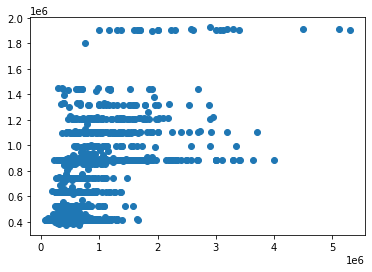

In [162]:
plt.scatter(Default_test['price'], y_pred)
plt.show()

In [163]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(417180.96) * Intercept + (-0.29) * lot_measure15 + (0.29) * total_area + (588552.27) * coast_1 + (108865.59) * sight + (465456.35) * furnished_1 + 

In [164]:
linear_mae_train=mean_absolute_error(y_train,lm1.predict(X_train))
print("The Mean Absolute Error (MAE) of the OLS model for the training set is",linear_mae_train)

The Mean Absolute Error (MAE) of the OLS model for the training set is 179886.76645533912


In [165]:
ypred = lm1.predict(X_test)
linear_mae_test=mean_absolute_error(y_test,ypred)
print("The Mean Absolute Error (MAE) of the OLS model for testing set is",linear_mae_test)

The Mean Absolute Error (MAE) of the OLS model for testing set is 178366.37028212028


# Linear Regression assumption checks

In [166]:
residuals = lm1.resid
np.mean(residuals)

3.040348990921366e-10

In [167]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.2530628472487517), ('p-value', 6.342294388596942e-23)]

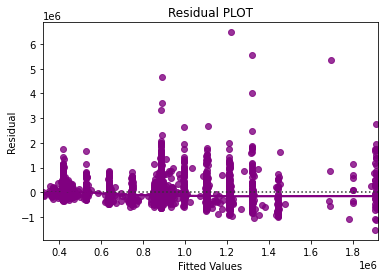

In [168]:
fitted = lm1.fittedvalues
sns.residplot(fitted, residuals, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

<AxesSubplot:ylabel='Density'>

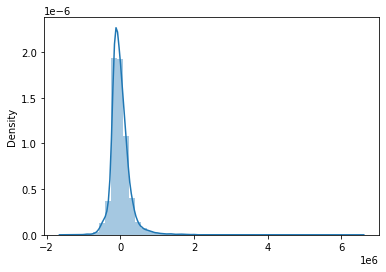

In [169]:
sns.distplot(residuals)

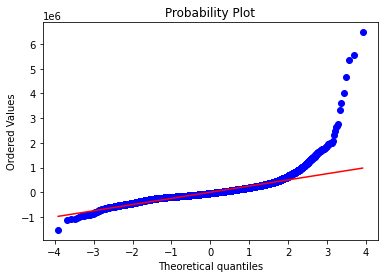

In [170]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

# Ridge and Lasso Regression

In [171]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
ridge = Ridge(alpha=0.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [-3.48132463e+04  8.39832310e+04 -1.68644204e+02 -3.18127646e+00
  1.46680311e+04  4.71796504e+04  2.10801856e+04  1.24418748e+05
  2.63144986e+02  2.77133214e+02  2.01046308e+04 -6.39358256e+01
  6.18859269e+01 -2.16784819e-01  1.24453795e-01  2.39545485e+04
  5.85711713e+05  4.85394429e+04]


In [172]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [-3.45867872e+04  8.39577213e+04 -1.68772733e+02 -3.20879997e+00
  1.41066516e+04  4.73828004e+04  2.03336610e+04  1.24323113e+05
  2.63131746e+02  2.76731566e+02  1.92398565e+03 -6.39653203e+01
  6.16779582e+01 -2.20281519e-01  1.30025263e-01  5.77408311e+03
  5.87224818e+05  4.86705501e+04]


In [173]:
ridge_train_acc=ridge.score(X_train, y_train)
print("Score of ridge model training set:",round((ridge_train_acc*100),2),'%')
ridge_test_acc=ridge.score(X_test, y_test)
print("Score of ridge model testing set:",round((ridge_test_acc*100),2),'%')

Score of ridge model training set: 63.25 %
Score of ridge model testing set: 64.84 %


In [174]:
lasso_train_acc=lasso.score(X_train, y_train)
print("Score of lasso model training set:",round((lasso_train_acc*100),2),'%')
lasso_test_acc=lasso.score(X_test, y_test)
print("Score of lasso model testing set:",round((lasso_test_acc*100),2),'%')

Score of lasso model training set: 63.19 %
Score of lasso model testing set: 64.77 %


In [175]:
from sklearn.metrics import mean_squared_error
ridge_mse_train=mean_squared_error(y_train, ridge.predict(X_train))
print("Mean Square Error of Ridge regression training set:",ridge_mse_train)

Mean Square Error of Ridge regression training set: 49625456285.21106


In [176]:
ridge_mse_test=mean_squared_error(y_test, ridge.predict(X_test))
print("Mean Square Error of Ridge regression testing set:",ridge_mse_test)

Mean Square Error of Ridge regression testing set: 47379146166.257935


In [177]:
lasso_mse_train=mean_squared_error(y_train, lasso.predict(X_train))
print("Mean Square Error of Lasso regression training set:",lasso_mse_train)

Mean Square Error of Lasso regression training set: 49697970671.34035


In [178]:
lasso_mse_test=mean_squared_error(y_test, lasso.predict(X_test))
print("Mean Square Error of Lasso regression testing set:",lasso_mse_test)

Mean Square Error of Lasso regression testing set: 47478537885.64541


In [179]:
ridge_rmsetr=np.sqrt(ridge_mse_train)
print("Root mean squared error of ridge regression training model:",ridge_rmsetr)

Root mean squared error of ridge regression training model: 222767.7182295744


In [180]:
ridge_rmsete=np.sqrt(ridge_mse_test)
print("Root mean squared error of ridge regression testing model:",ridge_rmsete)

Root mean squared error of ridge regression testing model: 217667.5128866454


In [181]:
lasso_rmsetr=np.sqrt(lasso_mse_train)
print("Root mean squared error of lasso regression training model:",lasso_rmsetr)

Root mean squared error of lasso regression training model: 222930.4166580692


In [182]:
lasso_rmsete=np.sqrt(lasso_mse_test)
print("Root mean squared error of lasso regression testing model:",lasso_rmsete)

Root mean squared error of lasso regression testing model: 217895.70414683584


In [183]:
ridge_mae_train=mean_absolute_error(y_train,ridge.predict(X_train))
print("The Mean Absolute Error (MAE) of the ridge model for the training set is",ridge_mae_train)

The Mean Absolute Error (MAE) of the ridge model for the training set is 140138.03810551885


In [184]:
ridge_mae_test=mean_absolute_error(y_test,ridge.predict(X_test))
print("The Mean Absolute Error (MAE) of the ridge model for the testing set is",ridge_mae_test)

The Mean Absolute Error (MAE) of the ridge model for the testing set is 138831.22932137267


In [185]:
lasso_mae_train=mean_absolute_error(y_train,lasso.predict(X_train))
print("The Mean Absolute Error (MAE) of the lasso model for the training set is",lasso_mae_train)

The Mean Absolute Error (MAE) of the lasso model for the training set is 140207.70362956158


In [186]:
lasso_mae_test=mean_absolute_error(y_test,lasso.predict(X_test))
print("The Mean Absolute Error (MAE) of the lasso model for the testing set is",lasso_mae_test)

The Mean Absolute Error (MAE) of the lasso model for the testing set is 138932.53453561568


In [187]:
from sklearn.preprocessing import PolynomialFeatures

In [188]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [189]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [190]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(15129, 172)

In [191]:
regression_model.fit(X_train, y_train)
print("Coefficient of polynomial linear regression is:",regression_model.coef_[0])

Coefficient of polynomial linear regression is: 1.2276198387670165e-10


In [192]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Polynomial Ridge model:", (ridge.coef_))

Polynomial Ridge model: [ 0.00000000e+00 -1.23930583e+04  3.14753241e+04  2.59041283e+05
 -2.11930253e+04 -9.05247100e+03  1.02333140e+04  2.03686789e+04
  1.06360154e+05 -1.33594783e+05 -6.93871971e+04  4.83862458e+05
 -1.10212264e+04  5.01354587e+04 -7.17936677e+04  6.46557891e+03
  5.72245933e+05  9.06229633e+04 -1.19482695e+03  1.77676050e+03
  1.22810194e+04  2.25086392e+03  1.09264723e+04 -7.66157212e+03
  5.94738558e+02 -1.23191694e+04 -1.94609119e+04 -8.73773231e+03
  1.15701094e+05 -3.08236933e+03  4.31038364e+03 -2.66109996e+02
  4.63033551e+03  1.24170957e+05 -5.32444944e+02  1.04863401e+04
 -8.58397355e+04  1.42015145e+04 -8.14197227e+03  5.24502977e+03
 -6.22579185e+03  5.51163968e+04  7.93936706e+04  4.33635707e+04
 -9.36830338e+04 -1.02814546e+04  6.16878716e+02 -9.13812990e+03
 -9.32816049e+03 -8.72437968e+04 -6.99027290e+03 -1.19386811e+04
  7.35330189e+03  2.11951893e+04  2.91262392e+04 -7.45588696e+03
 -9.44925711e+04  3.48298485e+03 -2.16189653e+04 -6.17791142e+04
 

In [193]:
poly_ridge_train=ridge.score(X_train, y_train)
print("Score of polynomial train ridge regression is:",round((poly_ridge_train*100),2),'%')
poly_ridge_test=ridge.score(X_test,y_test)
print("Score of polynomial test ridge regression is:",round((poly_ridge_test*100),2),'%')

Score of polynomial train ridge regression is: 74.46 %
Score of polynomial test ridge regression is: 73.48 %


In [194]:
ridgep_mse_train=mean_squared_error(y_train, ridge.predict(X_train))
print("Mean Square Error of polynomial Ridge regression training set:",ridgep_mse_train)

Mean Square Error of polynomial Ridge regression training set: 34483433793.837975


In [195]:
ridgep_mse_test=mean_squared_error(y_test, ridge.predict(X_test))
print("Mean Square Error of polynomial Ridge regression testing set:",ridgep_mse_test)

Mean Square Error of polynomial Ridge regression testing set: 35740597402.76423


In [196]:
ridgep_rmsetr=np.sqrt(ridgep_mse_train)
print("Root mean squared error of polynomial ridge regression training model:",ridgep_rmsetr)

Root mean squared error of polynomial ridge regression training model: 185697.15612749156


In [197]:
ridgep_rmsete=np.sqrt(ridgep_mse_test)
print("Root mean squared error of polynomial ridge regression testing model:",ridgep_rmsete)

Root mean squared error of polynomial ridge regression testing model: 189051.8378719557


In [198]:
ridgep_mae_train=mean_absolute_error(y_train,ridge.predict(X_train))
print("The Mean Absolute Error (MAE) of the polynomial ridge model for the training set is",ridgep_mae_train)

The Mean Absolute Error (MAE) of the polynomial ridge model for the training set is 122931.52607144504


In [199]:
ridgep_mae_test=mean_absolute_error(y_test,ridge.predict(X_test))
print("The Mean Absolute Error (MAE) of the polynomial ridge model for the testing set is",ridgep_mae_test)

The Mean Absolute Error (MAE) of the polynomial ridge model for the testing set is 122376.10575309872


In [200]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Polynomial Lasso model:", (lasso.coef_))

Polynomial Lasso model: [ 0.00000000e+00 -1.23437222e+04  3.20607806e+04  2.37536049e+05
 -2.07311054e+04 -9.44369136e+03  1.08579970e+04  1.98590227e+04
  1.05928597e+05 -1.14158810e+05 -5.95816606e+04  6.85031615e+04
 -1.11099185e+04  4.99874586e+04 -7.90961212e+04  1.09023270e+04
  1.57486486e+05  9.04786546e+04 -1.00783609e+01  1.91664256e+03
  9.42121078e+03  2.42144521e+03  1.10492393e+04 -7.32557467e+03
  4.83902276e+02 -1.23819776e+04 -1.72702066e+04 -7.68179348e+03
  3.35136694e+03 -3.06276544e+03  4.34801673e+03 -4.11254836e+02
  4.83673149e+03  1.20958689e+04 -6.58799483e+02  1.05503506e+04
 -9.04150586e+04  1.34333245e+04 -9.07598586e+03  5.24764175e+03
 -6.08140288e+03  5.44379849e+04  8.38613727e+04  4.54891960e+04
 -1.46848082e+04 -1.02735726e+04  1.00740611e+03 -9.39523509e+03
 -8.12097835e+03 -8.96986870e+03 -6.89425695e+03 -1.16666600e+04
 -1.05312642e+04  9.44382910e+03  2.33713117e+04  4.64310411e+03
 -7.14617114e+04  4.14203101e+03 -2.06055090e+04  9.94526264e+04
 

In [201]:
poly_lasso_train=lasso.score(X_train, y_train)
print("Score of polynomial lasso regression train model:",round((poly_lasso_train*100),2),'%')
poly_lasso_test=lasso.score(X_test, y_test)
print("Score of polynomial lasso regression test model:",round((poly_lasso_test*100),2),'%')

Score of polynomial lasso regression train model: 74.37 %
Score of polynomial lasso regression test model: 73.44 %


In [202]:
lassop_mse_train=mean_squared_error(y_train, lasso.predict(X_train))
print("Mean Square Error of polynomial Lasso regression training set:",lassop_mse_train)

Mean Square Error of polynomial Lasso regression training set: 34612460621.73506


In [203]:
lassop_mse_test=mean_squared_error(y_test, lasso.predict(X_test))
print("Mean Square Error of polynomial Lasso regression testing set:",lassop_mse_test)

Mean Square Error of polynomial Lasso regression testing set: 35796971081.89739


In [204]:
lassop_rmsetr=np.sqrt(lassop_mse_train)
print("Root mean squared error of polynomial lasso regression training model:",lassop_rmsetr)

Root mean squared error of polynomial lasso regression training model: 186044.24372104357


In [205]:
lassop_rmsete=np.sqrt(lassop_mse_test)
print("Root mean squared error of polynomial lasso regression testing model:",lassop_rmsete)

Root mean squared error of polynomial lasso regression testing model: 189200.87495013705


In [206]:
lassop_mae_train=mean_absolute_error(y_train,lasso.predict(X_train))
print("The Mean Absolute Error (MAE) of the polynomial lasso model for the training set is",lassop_mae_train)

The Mean Absolute Error (MAE) of the polynomial lasso model for the training set is 123037.09416001505


In [207]:
lassop_mae_test=mean_absolute_error(y_test,lasso.predict(X_test))
print("The Mean Absolute Error (MAE) of the polynomial lasso model for the testing set is",lassop_mae_test)

The Mean Absolute Error (MAE) of the polynomial lasso model for the testing set is 122518.78112223124


# Random Forest

In [208]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(max_depth=4,random_state=100)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, random_state=100)

In [209]:
rf_train_acc=round((rf_model.score(X_train,y_train)*100),2)
print ('Base Random Forest Train model score:' ,rf_train_acc,'%')

Base Random Forest Train model score: 69.83 %


In [210]:
rf_test_acc= round((rf_model.score(X_test,y_test)*100),2)
print ('Base Random Forest Test model score:', rf_test_acc,'%')

Base Random Forest Test model score: 67.29 %


In [211]:
rf_pred_train= rf_model.predict(X_train)
rf_pred_test= rf_model.predict(X_test)

In [212]:
rf_rmse_train=np.sqrt(mean_squared_error(y_train, rf_pred_train))
print("Root Mean Square Error of Random Forest training set:",rf_rmse_train)

Root Mean Square Error of Random Forest training set: 201837.18185987914


In [213]:
rf_rmse_test=np.sqrt(mean_squared_error(y_test, rf_pred_test))
print("Root Mean Square Error of Random Forest testing set:",rf_rmse_test)

Root Mean Square Error of Random Forest testing set: 209949.5386417792


In [214]:
rf_mse_train=mean_squared_error(y_train, rf_pred_train)
print("Mean Square Error of Random Forest training set:",rf_mse_train)

Mean Square Error of Random Forest training set: 40738247981.13793


In [215]:
rf_mse_test=mean_squared_error(y_test, rf_pred_test)
print("Mean Square Error of Random Forest testing set:",rf_mse_test)

Mean Square Error of Random Forest testing set: 44078808775.895935


In [216]:
rf_mae_train=mean_absolute_error(y_train, rf_pred_train)
print("Mean Absolute Error of Random Forest training set:",rf_mae_train)

Mean Absolute Error of Random Forest training set: 134049.42930469709


In [217]:
rf_mae_test=mean_absolute_error(y_test, rf_pred_test)
print("Mean Absolute Error of Random Forest testing set:",rf_mae_test)

Mean Absolute Error of Random Forest testing set: 136040.97194016547


# KNN

In [218]:
from scipy.stats import zscore

In [219]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [220]:
#X_scale=X[["living_measure","lot_measure","basement","age","ceil_measure","yr_built","zipcode","living_measure15","lot_measure15","total_area"]].apply(zscore)

In [221]:
#X_scale.head()

In [222]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [223]:
y_train_predict = KNN_model.predict(X_train_scaled)
knn_train1= KNN_model.score(X_train_scaled, y_train)
print("Score of KNN training model 1:",round((knn_train1*100),2),'%')

Score of KNN training model 1: 20.26 %


In [224]:
y_test_predict = KNN_model.predict(X_test_scaled)
knn_test1 = KNN_model.score(X_test_scaled, y_test)
print("Score of KNN testing model 1:",round((knn_test1*100),2),'%')

Score of KNN testing model 1: 0.54 %


In [225]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=7)

In [226]:
y_train_predict = KNN_model.predict(X_train_scaled)
knn_train2 = KNN_model.score(X_train_scaled, y_train)
print("Score of KNN training model 2:",round((knn_train2*100),2),'%')

Score of KNN training model 2: 14.74 %


In [227]:
y_test_predict = KNN_model.predict(X_test_scaled)
knn_test2 = KNN_model.score(X_test_scaled, y_test)
print("Score of KNN testing model 2:",round((knn_test2*100),2),'%')

Score of KNN testing model 2: 0.56 %


In [228]:
ac_scores = []
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores = knn.score(X_test_scaled, y_test)
    ac_scores.append(scores)

MCE = [1 - x for x in ac_scores]
MCE

[0.9912091301665639,
 0.9925971622455274,
 0.994602097470697,
 0.9944478716841456,
 0.9941394201110426,
 0.994602097470697,
 0.9949105490438002,
 0.9949105490438002,
 0.9947563232572486,
 0.9938309685379395]

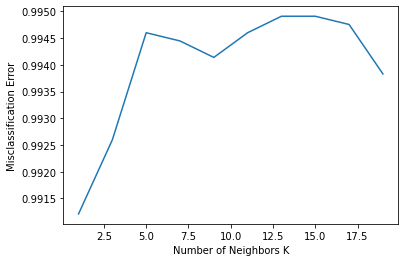

In [229]:
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [230]:
KNN_model=KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=1)

In [231]:
y_train_predict = KNN_model.predict(X_train_scaled)
knn_train_acc = KNN_model.score(X_train_scaled, y_train)
print("Score of selected KNN training model :",round((knn_train_acc*100),2),'%')

Score of selected KNN training model : 99.93 %


In [232]:
y_test_predict = KNN_model.predict(X_test_scaled)
knn_test_acc = KNN_model.score(X_test_scaled, y_test)
print("Score of selected KNN testing model :",round((knn_test_acc*100),2),'%')

Score of selected KNN testing model : 0.88 %


In [233]:
knn_rmse_train=np.sqrt(mean_squared_error(y_train, y_train_predict))
print("Root Mean Square Error of KNN training set:",knn_rmse_train)

Root Mean Square Error of KNN training set: 3159.3142164081346


In [234]:
knn_rmse_test=np.sqrt(mean_squared_error(y_test, y_test_predict))
print("Root Mean Square Error of KNN testing set:",knn_rmse_test)

Root Mean Square Error of KNN testing set: 236828.49351060358


In [235]:
knn_mse_train=mean_squared_error(y_train, y_train_predict)
print("Mean Square Error of KNN training set:",knn_mse_train)
knn_mse_test=mean_squared_error(y_test, y_test_predict)
print("Mean Square Error of KNN testing set:",knn_mse_test)

Mean Square Error of KNN training set: 9981266.317998545
Mean Square Error of KNN testing set: 56087735338.50201


In [236]:
knn_mae_train=mean_absolute_error(y_train, y_train_predict)
print("Mean Absolute Error of KNN training set:",knn_mae_train)
knn_mae_test=mean_absolute_error(y_test, y_test_predict)
print("Mean Absolute Error of KNN testing set:",knn_mae_test)

Mean Absolute Error of KNN training set: 66.55264723378941
Mean Absolute Error of KNN testing set: 142949.34469463295


In [237]:
KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [238]:
y_train_predict = KNN_model.predict(X_train_scaled)
knn_train3 = KNN_model.score(X_train_scaled, y_train)
print("Score of KNN alternate training model:",round((knn_train3*100),2),'%')

Score of KNN alternate training model: 33.14 %


In [239]:
y_test_predict = KNN_model.predict(X_test_scaled)
knn_test3 = KNN_model.score(X_test_scaled, y_test)
print("Score of KNN alternate testing model :",round((knn_test3*100),2),'%')

Score of KNN alternate testing model : 0.74 %


# AdaBoosting

In [240]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(random_state=1)
abcl = abcl.fit(X_train, y_train)

In [241]:
y_predict = abcl.predict(X_test)
bst_test=abcl.score(X_test, y_test)
print("Score of Boosting testing model :",round((bst_test*100),2),'%')

Score of Boosting testing model : 0.79 %


In [242]:
bst_train=abcl.score(X_train,y_train)
print("Score of Boosting training model :",round((bst_train*100),2),'%')

Score of Boosting training model : 0.97 %


In [243]:
bst_train_predict = abcl.predict(X_train)
bst_test_predict = abcl.predict(X_test)
bst_rmse_train=np.sqrt(mean_squared_error(y_train, bst_train_predict))
print("Root Mean Square Error of AdaBoosting training set:",bst_rmse_train)
bst_rmse_test=np.sqrt(mean_squared_error(y_test, bst_test_predict))
print("Root Mean Square Error of AdaBoosting testing set:",bst_rmse_test)

Root Mean Square Error of AdaBoosting training set: 365681.5774874997
Root Mean Square Error of AdaBoosting testing set: 372429.4813058698


In [244]:
bst_mse_train=mean_squared_error(y_train, bst_train_predict)
print("Mean Square Error of AdaBoosting training set:",bst_mse_train)
bst_mse_test=mean_squared_error(y_test, bst_test_predict)
print("Mean Square Error of AdaBoosting testing set:",bst_mse_test)

Mean Square Error of AdaBoosting training set: 133723016113.74625
Mean Square Error of AdaBoosting testing set: 138703718545.75925


In [245]:
bst_mae_train=mean_absolute_error(y_train, bst_train_predict)
print("Mean Absolute Error of AdaBoosting training set:",bst_mae_train)
bst_mae_test=mean_absolute_error(y_test, bst_test_predict)
print("Mean Absolute Error of AdaBoosting testing set:",bst_mae_test)

Mean Absolute Error of AdaBoosting training set: 214098.63751735078
Mean Absolute Error of AdaBoosting testing set: 215444.30367057372


# Support vector machine

In [246]:
from sklearn.svm import SVR
SVR1 = SVR(gamma='auto',C=10.0, epsilon=0.2,kernel='rbf')
SVR1.fit(X_train, y_train)

SVR(C=10.0, epsilon=0.2, gamma='auto')

In [247]:
y_SVR1_predtr= SVR1.predict(X_train)
y_SVR1_predvl= SVR1.predict(X_test)

In [248]:
from sklearn.metrics import r2_score
SVR1_trscore=r2_score(y_train,y_SVR1_predtr)
print("Score of SVM training model :",round((SVR1_trscore*100),2),'%')
SVR1_trRMSE=np.sqrt(mean_squared_error(y_train, y_SVR1_predtr))
print("Root Mean Square Error of SVM training model :",SVR1_trRMSE)
SVR1_trMSE=mean_squared_error(y_train, y_SVR1_predtr)
print("Mean Square Error of SVM training model :",SVR1_trMSE)
SVR1_trMAE=mean_absolute_error(y_train, y_SVR1_predtr)
print("Mean Absolute Error of SVM training model :",SVR1_trMAE)

Score of SVM training model : -4.31 %
Root Mean Square Error of SVM training model : 375303.28999414237
Mean Square Error of SVM training model : 140852559480.42734
Mean Absolute Error of SVM training model : 220882.22926936788


In [249]:
SVR1_vlscore=r2_score(y_test,y_SVR1_predvl)
print("Score of SVM testing model :",round((SVR1_vlscore*100),2),'%')
SVR1_vlRMSE=np.sqrt(mean_squared_error(y_test, y_SVR1_predvl))
print("Root Mean Square Error of SVM testing model :",SVR1_vlRMSE)
SVR1_vlMSE=mean_squared_error(y_test, y_SVR1_predvl)
print("Mean Square Error of SVM testing model :",SVR1_vlMSE)
SVR1_vlMAE=mean_absolute_error(y_test, y_SVR1_predvl)
print("Mean Absolute Error of SVM testing model :",SVR1_vlMAE)

Score of SVM testing model : -4.17 %
Root Mean Square Error of SVM testing model : 374674.37978614843
Mean Square Error of SVM testing model : 140380890868.135
Mean Absolute Error of SVM testing model : 216997.94424533917


In [250]:
SVR2 = SVR(gamma='auto',C=0.1,kernel='linear')
SVR2.fit(X_train, y_train)

SVR(C=0.1, gamma='auto', kernel='linear')

In [251]:
y_SVR2_predtr= SVR2.predict(X_train)
y_SVR2_predvl= SVR2.predict(X_test)

In [252]:
SVR2_trscore=r2_score(y_train,y_SVR2_predtr)
print("Score of SVM training model :",round((SVR2_trscore*100),2),'%')
SVR2_trRMSE=np.sqrt(mean_squared_error(y_train, y_SVR2_predtr))
print("Root Mean Square Error of SVM training model :",SVR2_trRMSE)
SVR2_trMSE=mean_squared_error(y_train, y_SVR2_predtr)
print("Mean Square Error of SVM training model :",SVR2_trMSE)
SVR2_trMAE=mean_absolute_error(y_train, y_SVR2_predtr)
print("Mean Absolute Error of SVM training model :",SVR2_trMAE)

Score of SVM training model : 0.18 %
Root Mean Square Error of SVM training model : 367126.9964265735
Mean Square Error of SVM training model : 134782231505.1973
Mean Absolute Error of SVM training model : 217318.60873389512


In [253]:
SVR2_vlscore=r2_score(y_test,y_SVR2_predvl)
print("Score of SVM testing model :",round((SVR2_vlscore*100),2),'%')
SVR2_vlRMSE=np.sqrt(mean_squared_error(y_test, y_SVR2_predvl))
print("Root Mean Square Error of SVM testing model :",SVR2_vlRMSE)
SVR2_vlMSE=mean_squared_error(y_test, y_SVR2_predvl)
print("Mean Square Error of SVM testing model :",SVR2_vlMSE)
SVR2_vlMAE=mean_absolute_error(y_test, y_SVR2_predvl)
print("Mean Absolute Error of SVM testing model :",SVR2_vlMAE)

Score of SVM testing model : 0.56 %
Root Mean Square Error of SVM testing model : 366070.3848594939
Mean Square Error of SVM testing model : 134007526671.17798
Mean Absolute Error of SVM testing model : 213448.56691151243


In [254]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(House.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(House.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [255]:
X.head()

,room_bed,room_bath,living_measure,lot_measure,ceil,sight,condition,quality,ceil_measure,basement,yr_built,zipcode,living_measure15,lot_measure15,total_area,age,coast_1,furnished_1
0,4,1.75,3050.00,9440.00,1.00,0,3,8,1800.00,1250.00,1966,98034,2020.00,8660.00,12490.00,49.00,0,0
1,2,1.00,670.00,3101.00,1.00,0,4,6,670.00,0.00,1948,98118,1660.00,4100.00,3771.00,67.00,0,0
2,4,2.75,3040.00,2415.00,2.00,4,3,8,3040.00,0.00,1966,98118,2620.00,2433.00,5455.00,48.00,1,0
3,3,2.50,1740.00,3721.00,2.00,0,3,8,1740.00,0.00,2009,98002,2030.00,3794.00,5461.00,5.00,0,0
4,2,1.00,1120.00,4590.00,1.00,0,3,7,1120.00,0.00,1924,98118,1120.00,5100.00,5710.00,91.00,0,0


In [256]:
#from factor_analyzer import FactorAnalyzer
#from factor_analyzer.factor_analyzer import calculate_kmo
#kmo_all,kmo_model=calculate_kmo(data_standard)
#kmo_model
X_train.shape

(15129, 172)

# Gradient Boosting

In [257]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
GB1=GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1,random_state=22)
GB1.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=22)

In [258]:
y_GB1_predtr= GB1.predict(X_train)
y_GB1_predvl= GB1.predict(X_test)

In [259]:
GB1_trscore=r2_score(y_train,y_GB1_predtr)
print("Score of Gradient Boosting training model :",round((GB1_trscore*100),2),'%')
GB1_trRMSE=np.sqrt(mean_squared_error(y_train, y_GB1_predtr))
print("Root Mean Square Error of Gradient Boosting training model :",GB1_trRMSE)
GB1_trMSE=mean_squared_error(y_train, y_GB1_predtr)
print("Mean Square Error of Gradient Boosting training model :",GB1_trMSE)
GB1_trMAE=mean_absolute_error(y_train, y_GB1_predtr)
print("Mean Absolute Error of Gradient Boosting training model :",GB1_trMAE)

Score of Gradient Boosting training model : 90.47 %
Root Mean Square Error of Gradient Boosting training model : 113437.23671245294
Mean Square Error of Gradient Boosting training model : 12868006672.95708
Mean Absolute Error of Gradient Boosting training model : 79844.46742914348


In [260]:
GB1_vlscore=r2_score(y_test,y_GB1_predvl)
print("Score of Gradient Boosting testing model :",round((GB1_vlscore*100),2),'%')
GB1_vlRMSE=np.sqrt(mean_squared_error(y_test, y_GB1_predvl))
print("Root Mean Square Error of Gradient Boosting testing model :",GB1_vlRMSE)
GB1_vlMSE=mean_squared_error(y_test, y_GB1_predvl)
print("Mean Square Error of Gradient Boosting testing model :",GB1_vlMSE)
GB1_vlMAE=mean_absolute_error(y_test, y_GB1_predvl)
print("Mean Absolute Error of Gradient Boosting testing model :",GB1_vlMAE)

Score of Gradient Boosting testing model : 85.41 %
Root Mean Square Error of Gradient Boosting testing model : 140213.62920973357
Mean Square Error of Gradient Boosting testing model : 19659861816.164654
Mean Absolute Error of Gradient Boosting testing model : 88767.43808734526


# Bagging

In [261]:
BGG1=BaggingRegressor(n_estimators=50, oob_score= True,random_state=14)
BGG1.fit(X_train, y_train)

BaggingRegressor(n_estimators=50, oob_score=True, random_state=14)

In [262]:
y_BGG1_predtr= BGG1.predict(X_train)
y_BGG1_predvl= BGG1.predict(X_test)

In [263]:
BGG1_trscore=r2_score(y_train,y_BGG1_predtr)
print("Score of Bagging training model :",round((BGG1_trscore*100),2),'%')
BGG1_trRMSE=np.sqrt(mean_squared_error(y_train, y_BGG1_predtr))
print("Root Mean Square Error of Bagging training model :",BGG1_trRMSE)
BGG1_trMSE=mean_squared_error(y_train, y_BGG1_predtr)
print("Mean Square Error of Bagging training model :",BGG1_trMSE)
BGG1_trMAE=mean_absolute_error(y_train, y_GB1_predtr)
print("Mean Absolute Error of Bagging training model :",BGG1_trMAE)

Score of Bagging training model : 96.78 %
Root Mean Square Error of Bagging training model : 65903.26995291673
Mean Square Error of Bagging training model : 4343240990.487018
Mean Absolute Error of Bagging training model : 79844.46742914348


In [264]:
BGG1_vlscore=r2_score(y_test,y_BGG1_predvl)
print("Score of Bagging testing model :",round((BGG1_vlscore*100),2),'%')
BGG1_vlRMSE=np.sqrt(mean_squared_error(y_test, y_BGG1_predvl))
print("Root Mean Square Error of Bagging testing model :",BGG1_vlRMSE)
BGG1_vlMSE=mean_squared_error(y_test, y_BGG1_predvl)
print("Mean Square Error of Bagging testing model :",BGG1_vlMSE)
BGG1_vlMAE=mean_absolute_error(y_test, y_BGG1_predvl)
print("Mean Absolute Error of Bagging testing model :",BGG1_vlMAE)

Score of Bagging testing model : 80.98 %
Root Mean Square Error of Bagging testing model : 160108.29993580826
Mean Square Error of Bagging testing model : 25634667708.334736
Mean Absolute Error of Bagging testing model : 93523.48184216092


In [265]:
feature_importances = pd.DataFrame(GB1.feature_importances_[0],index=X.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(15)

,importance
room_bed,0.00
room_bath,0.00
coast_1,0.00
age,0.00
total_area,0.00
lot_measure15,0.00
living_measure15,0.00
zipcode,0.00
yr_built,0.00
basement,0.00


In [266]:
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100
BGG1_vlMAPE=mape(y_test, y_BGG1_predvl)
print("Mean Absolute Percentage Error of Bagging testing model :",BGG1_vlMAPE)
BGG1_trMAPE=mape(y_train, y_GB1_predtr)
print("Mean Absolute Percentage Error of Bagging training model :",BGG1_trMAPE)
GB1_vlMAPE=mape(y_test, y_GB1_predvl)
print("Mean Absolute Percentage Error of Gradient Boosting testing model :",GB1_vlMAPE)
GB1_trMAPE=mape(y_train, y_GB1_predtr)
print("Mean Absolute Percentage Error of Gradient Boosting training model :",GB1_trMAPE)
SVR2_vlMAPE=mape(y_test, y_SVR2_predvl)
print("Mean Absolute Percentage Error of SVM testing model :",SVR2_vlMAPE)
SVR2_trMAPE=mape(y_train, y_SVR2_predtr)
print("Mean Absolute Percentage Error of SVM training model :",SVR2_trMAPE)
bst_mape_train=mape(y_train, bst_train_predict)
print("Mean Absolute Percentage Error of AdaBoosting training set:",bst_mape_train)
bst_mape_test=mape(y_test, bst_test_predict)
print("Mean Absolute Percentage Error of AdaBoosting testing set:",bst_mape_test)
knn_mape_train=mape(y_train, y_train_predict)
print("Mean Absolute Percentage Error of KNN training set:",knn_mape_train)
knn_mape_test=mape(y_test, y_test_predict)
print("Mean Absolute Percentage Error of KNN testing set:",knn_mape_test)
rf_mape_train=mape(y_train, rf_pred_train)
print("Mean Absolute Percentage Error of Random Forest training set:",rf_mape_train)
rf_mape_test=mape(y_test, rf_pred_test)
print("Mean Absolute Percentage Error of Random Forest testing set:",rf_mape_test)
lassop_mape_train=mape(y_train,lasso.predict(X_train))
print("The Mean Absolute Percentage Error (MAPE) of the polynomial lasso model for the training set is",lassop_mape_train)
lassop_mape_test=mape(y_test,lasso.predict(X_test))
print("The Mean Absolute Percentage Error (MAPE) of the polynomial lasso model for the testing set is",lassop_mape_test)
ridgep_mape_train=mape(y_train,ridge.predict(X_train))
print("The Mean Absolute Percentage Error (MAPE) of the polynomial ridge model for the training set is",ridgep_mape_train)
ridgep_mape_test=mape(y_test,ridge.predict(X_test))
print("The Mean Absolute Percentage Error (MAPE) of the polynomial ridge model for the testing set is",ridgep_mape_test)
linear_mape_test=mape(y_test, linear_pred_test)
print("Mean Absolute Percentage Error of base Linear regression testing set:",linear_mape_test)
linear_mape_train=mape(y_train, linear_pred_train)
print("Mean Absolute Percentage Error of base Linear Regression training set:",linear_mape_train)

Mean Absolute Percentage Error of Bagging testing model : 16.566166897259862
Mean Absolute Percentage Error of Bagging training model : 15.379349360336569
Mean Absolute Percentage Error of Gradient Boosting testing model : 16.358810309173233
Mean Absolute Percentage Error of Gradient Boosting training model : 15.379349360336569
Mean Absolute Percentage Error of SVM testing model : 45.596548549137346
Mean Absolute Percentage Error of SVM training model : 46.49809704057619
Mean Absolute Percentage Error of AdaBoosting training set: 58.077525412675726
Mean Absolute Percentage Error of AdaBoosting testing set: 59.01434469463257
Mean Absolute Percentage Error of KNN training set: 29.406996685647208
Mean Absolute Percentage Error of KNN testing set: 41.35474465218129
Mean Absolute Percentage Error of Random Forest training set: 24.976582369405612
Mean Absolute Percentage Error of Random Forest testing set: 25.170854612315175
The Mean Absolute Percentage Error (MAPE) of the polynomial lasso m

In [268]:
index=['Score', 'MSE', 'RMSE','MAE','MAPE']
rf_acc_train=rf_model.score(X_train,y_train)
rf_acc_test=rf_model.score(X_test,y_test)
data = pd.DataFrame({'Linear Regression Train':[linear_acc_train,linear_mse_train,linear_rmse_train,linear_mae_train,linear_mape_train],
        'Linear Regression Test':[linear_acc_test,linear_mse_test,linear_rmse_test,linear_mae_test,linear_mape_test],
       'Random Forest Train':[rf_acc_train,rf_mse_train,rf_rmse_train,rf_mae_train,rf_mape_train],
        'Random Forest Test':[rf_acc_test,rf_mse_test,rf_rmse_test,rf_mae_test,rf_mape_test],
       'KNN Train':[knn_train_acc,knn_mse_train,knn_rmse_train,knn_mae_train,knn_mape_train],
        'KNN Test':[knn_test_acc,knn_mse_test,knn_rmse_test,knn_mae_test,knn_mape_test],
         'Ridge Regression Train':[poly_ridge_train,ridgep_mse_train,ridgep_rmsetr,ridgep_mae_train,ridgep_mape_train],
        'Ridge Regression Test':[poly_ridge_test,ridgep_mse_test,ridgep_rmsete,ridgep_mae_test,ridgep_mape_test], 
         'Lasso Regression Train':[poly_lasso_train,lassop_mse_train,lassop_rmsetr,lassop_mae_train,lassop_mape_train],
        'Lasso Regression Test':[poly_lasso_test,lassop_mse_test,lassop_rmsete,lassop_mae_test,lassop_mape_test],           
         'Gradient Boosting Train':[GB1_trscore,GB1_trMSE,GB1_trRMSE,GB1_trMAE,GB1_trMAPE],
        'Gradient Boosting Test':[GB1_vlscore,GB1_vlMSE,GB1_vlRMSE,GB1_vlMAE,GB1_vlMAPE],  
        'SVM Train':[SVR2_trscore,SVR2_trMSE,SVR2_trRMSE,SVR2_trMAE,SVR2_trMAPE],
        'SVM Test':[SVR2_vlscore,SVR2_vlMSE,SVR2_vlRMSE,SVR2_vlMAE,SVR2_vlMAPE],
        'Bagging Train':[BGG1_trscore,BGG1_trMSE,BGG1_trRMSE,BGG1_trMAE,BGG1_trMAPE],
        'Bagging Test':[BGG1_vlscore,BGG1_vlMSE,BGG1_vlRMSE,BGG1_vlMAE,BGG1_vlMAPE],
        'Ada Boosting Train':[bst_train,bst_mse_train,bst_rmse_train,bst_mae_train,bst_mape_train],
        'Ada Boosting Test':[bst_test,bst_mse_test,bst_rmse_test,bst_mae_test,bst_mape_test]},index=index)
round(data,2)

,Linear Regression Train,Linear Regression Test,Random Forest Train,Random Forest Test,KNN Train,KNN Test,Ridge Regression Train,Ridge Regression Test,Lasso Regression Train,Lasso Regression Test,Gradient Boosting Train,Gradient Boosting Test,SVM Train,SVM Test,Bagging Train,Bagging Test,Ada Boosting Train,Ada Boosting Test
Score,0.63,0.65,0.70,0.67,1.00,0.01,0.74,0.73,0.74,0.73,0.90,0.85,0.00,0.01,0.97,0.81,0.01,0.01
MSE,49625433837.53,47376417107.58,40738247981.14,44078808775.90,9981266.32,56087735338.50,34483433793.84,35740597402.76,34612460621.74,35796971081.90,12868006672.96,19659861816.16,134782231505.20,134007526671.18,4343240990.49,25634667708.33,133723016113.75,138703718545.76
RMSE,222767.67,217661.24,201837.18,209949.54,3159.31,236828.49,185697.16,189051.84,186044.24,189200.87,113437.24,140213.63,367127.00,366070.38,65903.27,160108.30,365681.58,372429.48
MAE,179886.77,178366.37,134049.43,136040.97,66.55,142949.34,122931.53,122376.11,123037.09,122518.78,79844.47,88767.44,217318.61,213448.57,79844.47,93523.48,214098.64,215444.30
MAPE,28.71,27.09,24.98,25.17,29.41,41.35,23.43,22.94,23.24,22.88,15.38,16.36,46.50,45.60,15.38,16.57,58.08,59.01


<AxesSubplot:xlabel='price'>

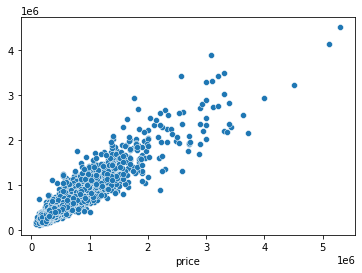

In [270]:
sns.scatterplot(y_test, y_GB1_predvl)

<AxesSubplot:xlabel='price', ylabel='price'>

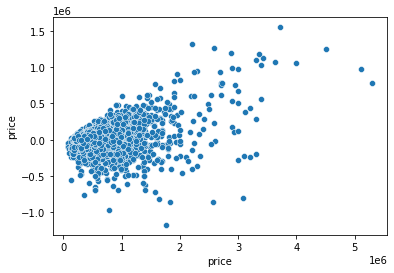

In [271]:
residuals = y_test - y_GB1_predvl
sns.scatterplot(y_test, residuals)